In [1]:
!pip install plotly
!pip install kneed
!pip install polars
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import json

In [3]:
df = pl.read_parquet("al_2month_export_v1.parquet")
df

shape: (16_393_861, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ event_typ ┆ event_nam ┆ event_tim ┆ shop      ┆ … ┆ session_i ┆ _client_i ┆ event_det ┆ event_de │
│ e         ┆ e         ┆ estamp    ┆ ---       ┆   ┆ d         ┆ d         ┆ ails_id   ┆ tails_cl │
│ ---       ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ientId   │
│ str       ┆ str       ┆ datetime[ ┆           ┆   ┆ str       ┆ str       ┆ str       ┆ ---      │
│           ┆           ┆ ns, UTC]  ┆           ┆   ┆           ┆           ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ customer_ ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ 64f91fde- ┆ abbottlyo ┆ sh-8b85fe ┆ 64f91fde │
│ event     ┆ iewed     ┆ 2 01:00:0 ┆ on-global ┆   ┆ f068-4527 ┆ n         ┆ 85-AD58-4 ┆ -f068-45 │
│           ┆           ┆ 1.155 UTC ┆ .myshopif ┆   ┆ -afd9-767 ┆           ┆ 899-9F57- ┆ 27-afd9- │
│           ┆           ┆           ┆ y.c…      ┆   ┆ 7df…      ┆           ┆ F43…      ┆ 7677df…  │
│ customer_ ┆ page_view ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ 64f91fde- ┆ abbottlyo ┆ sh-8b85fe ┆ 64f91fde │
│ event     ┆ ed        ┆ 2 01:00:0 ┆ on-global ┆   ┆ f068-4527 ┆ n         ┆ 85-3A7A-4 ┆ -f068-45 │
│           ┆           ┆ 1.155 UTC ┆ .myshopif ┆   ┆ -afd9-767 ┆           ┆ 516-5818- ┆ 27-afd9- │
│           ┆           ┆           ┆ y.c…      ┆   ┆ 7df…      ┆           ┆ 61D…      ┆ 7677df…  │
│ customer_ ┆ page_view ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ e84daab0- ┆ abbottlyo ┆ sh-8b8605 ┆ e84daab0 │
│ event     ┆ ed        ┆ 2 01:00:0 ┆ on-global ┆   ┆ 8fa4-4c25 ┆ n         ┆ c2-B865-4 ┆ -8fa4-4c │
│           ┆           ┆ 1.327 UTC ┆ .myshopif ┆   ┆ -affa-08a ┆           ┆ 893-E01F- ┆ 25-affa- │
│           ┆           ┆           ┆ y.c…      ┆   ┆ b5b…      ┆           ┆ 04C…      ┆ 08ab5b…  │
│ customer_ ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ 8dc27076- ┆ abbottlyo ┆ sh-8b860a ┆ 8dc27076 │
│ event     ┆ iewed     ┆ 2 01:00:0 ┆ on-us.mys ┆   ┆ d2b4-4030 ┆ n         ┆ 1d-F1DF-4 ┆ -d2b4-40 │
│           ┆           ┆ 3.114 UTC ┆ hopify.co ┆   ┆ -b02b-1c3 ┆           ┆ 94F-2BD5- ┆ 30-b02b- │
│           ┆           ┆           ┆ m         ┆   ┆ 733…      ┆           ┆ 90C…      ┆ 1c3733…  │
│ customer_ ┆ page_view ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ 8dc27076- ┆ abbottlyo ┆ sh-8b860a ┆ 8dc27076 │
│ event     ┆ ed        ┆ 2 01:00:0 ┆ on-us.mys ┆   ┆ d2b4-4030 ┆ n         ┆ 1c-E85E-4 ┆ -d2b4-40 │
│           ┆           ┆ 3.114 UTC ┆ hopify.co ┆   ┆ -b02b-1c3 ┆           ┆ 35B-0C90- ┆ 30-b02b- │
│           ┆           ┆           ┆ m         ┆   ┆ 733…      ┆           ┆ 2A2…      ┆ 1c3733…  │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ customer_ ┆ page_view ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ 68ED988F- ┆ abbottlyo ┆ sh-bb263d ┆ 68ED988F │
│ event     ┆ ed        ┆ 1 23:59:5 ┆ on-global ┆   ┆ 97ac-46A9 ┆ n         ┆ 5f-38D6-4 ┆ -97ac-46 │
│           ┆           ┆ 4.087 UTC ┆ .myshopif ┆   ┆ -a0a3-5cf ┆           ┆ 6EE-BC92- ┆ A9-a0a3- │
│           ┆           ┆           ┆ y.c…      ┆   ┆ 13e…      ┆           ┆ 3C2…      ┆ 5cf13e…  │
│ customer_ ┆ page_view ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ 5662ef09- ┆ abbottlyo ┆ sh-bb2628 ┆ 5662ef09 │
│ event     ┆ ed        ┆ 1 23:59:5 ┆ on-us.mys ┆   ┆ 1949-458c ┆ n         ┆ ba-682F-4 ┆ -1949-45 │
│           ┆           ┆ 4.249 UTC ┆ hopify.co ┆   ┆ -9859-0f3 ┆           ┆ 306-A5F4- ┆ 8c-9859- │
│           ┆           ┆           ┆ m         ┆   ┆ a25…      ┆           ┆ 6CF…      ┆ 0f3a25…  │
│ customer_ ┆ page_view ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ AB93DF92- ┆ abbottlyo ┆ sh-bb262d ┆ AB93DF92 │
│ event     ┆ ed        ┆ 1 23:59:5 ┆ on-global ┆   ┆ d914-4087 ┆ n         ┆ 37-1D4F-4 ┆ -d914-40 │
│           ┆           ┆ 5.190 UTC ┆ .myshopif ┆   ┆ -9ac0-d7e ┆           ┆ 5FB-5BF4- ┆ 87-9ac0- │
│           ┆           ┆           ┆

In [4]:
df = df.drop_nulls()

In [5]:
def configure_geography(df):
    # Set geography based on shop column
    df = df.with_columns(
        geography=pl.when(pl.col("shop") == "abbott-lyon-global.myshopify.com")
        .then(pl.lit("Global"))
        .otherwise(pl.lit("US"))
        .cast(pl.Utf8)
    )
    
    return df


def configure_user_agent(df: pl.DataFrame) -> pl.DataFrame:
    # Extract OS family using vectorized string operations
    df = df.with_columns(
        device=pl.when(pl.col("user_agent").str.contains("iPhone|iPad|iOS"))
        .then(pl.lit("iOS"))
        .when(pl.col("user_agent").str.contains("Android"))
        .then(pl.lit("Android"))
        .when(pl.col("user_agent").str.contains("Windows"))
        .then(pl.lit("Windows"))
        .when(pl.col("user_agent").str.contains("Mac OS|Macintosh"))
        .then(pl.lit("macOS"))
        .when(pl.col("user_agent").str.contains("Linux Mint"))
        .then(pl.lit("Linux"))
        .when(pl.col("user_agent").str.contains("Linux"))
        .then(pl.lit("Linux"))
        .when(pl.col("user_agent").str.contains("Tizen|Ubuntu|OpenBSD|FreeBSD|BlackBerry"))
        .then(pl.lit("Other"))
        .otherwise(pl.lit("Other"))
        .cast(pl.Utf8)
    )
    
    # Apply additional device transformations
    df = df.with_columns(
        device=pl.when(pl.col("device") == "Linux Mint")
        .then(pl.lit("Linux"))
        .when(pl.col("device").is_in(["Tizen", "Ubuntu", "OpenBSD", "FreeBSD", "BlackBerry"]))
        .then(pl.lit("Other"))
        .otherwise(pl.col("device"))
        .cast(pl.Utf8)
    )
    
    return df

In [6]:
df = configure_geography(df)
df = configure_user_agent(df)
df

shape: (16_316_995, 12)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬─────────┐
│ event_type ┆ event_nam ┆ event_tim ┆ shop      ┆ … ┆ event_det ┆ event_det ┆ geography ┆ device  │
│ ---        ┆ e         ┆ estamp    ┆ ---       ┆   ┆ ails_id   ┆ ails_clie ┆ ---       ┆ ---     │
│ str        ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ntId      ┆ str       ┆ str     │
│            ┆ str       ┆ datetime[ ┆           ┆   ┆ str       ┆ ---       ┆           ┆         │
│            ┆           ┆ ns, UTC]  ┆           ┆   ┆           ┆ str       ┆           ┆         │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═════════╡
│ customer_e ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b85fe ┆ 64f91fde- ┆ Global    ┆ iOS     │
│ vent       ┆ iewed     ┆ 2 01:00:0 ┆ on-global ┆   ┆ 85-AD58-4 ┆ f068-4527 ┆           ┆         │
│            ┆           ┆ 1.155 UTC ┆ .myshopif ┆   ┆ 899-9F57- ┆ -afd9-767 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ F43…      ┆ 7df…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b85fe ┆ 64f91fde- ┆ Global    ┆ iOS     │
│ vent       ┆ ed        ┆ 2 01:00:0 ┆ on-global ┆   ┆ 85-3A7A-4 ┆ f068-4527 ┆           ┆         │
│            ┆           ┆ 1.155 UTC ┆ .myshopif ┆   ┆ 516-5818- ┆ -afd9-767 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 61D…      ┆ 7df…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8605 ┆ e84daab0- ┆ Global    ┆ iOS     │
│ vent       ┆ ed        ┆ 2 01:00:0 ┆ on-global ┆   ┆ c2-B865-4 ┆ 8fa4-4c25 ┆           ┆         │
│            ┆           ┆ 1.327 UTC ┆ .myshopif ┆   ┆ 893-E01F- ┆ -affa-08a ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 04C…      ┆ b5b…      ┆           ┆         │
│ customer_e ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b860a ┆ 8dc27076- ┆ US        ┆ iOS     │
│ vent       ┆ iewed     ┆ 2 01:00:0 ┆ on-us.mys ┆   ┆ 1d-F1DF-4 ┆ d2b4-4030 ┆           ┆         │
│            ┆           ┆ 3.114 UTC ┆ hopify.co ┆   ┆ 94F-2BD5- ┆ -b02b-1c3 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 90C…      ┆ 733…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b860a ┆ 8dc27076- ┆ US        ┆ iOS     │
│ vent       ┆ ed        ┆ 2 01:00:0 ┆ on-us.mys ┆   ┆ 1c-E85E-4 ┆ d2b4-4030 ┆           ┆         │
│            ┆           ┆ 3.114 UTC ┆ hopify.co ┆   ┆ 35B-0C90- ┆ -b02b-1c3 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 2A2…      ┆ 733…      ┆           ┆         │
│ …          ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …       │
│ customer_e ┆ page_view ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb263d ┆ 68ED988F- ┆ Global    ┆ Android │
│ vent       ┆ ed        ┆ 1 23:59:5 ┆ on-global ┆   ┆ 5f-38D6-4 ┆ 97ac-46A9 ┆           ┆         │
│            ┆           ┆ 4.087 UTC ┆ .myshopif ┆   ┆ 6EE-BC92- ┆ -a0a3-5cf ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 3C2…      ┆ 13e…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb2628 ┆ 5662ef09- ┆ US        ┆ iOS     │
│ vent       ┆ ed        ┆ 1 23:59:5 ┆ on-us.mys ┆   ┆ ba-682F-4 ┆ 1949-458c ┆           ┆         │
│            ┆           ┆ 4.249 UTC ┆ hopify.co ┆   ┆ 306-A5F4- ┆ -9859-0f3 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 6CF…      ┆ a25…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb262d ┆ AB93DF92- ┆ Global    ┆ iOS     │
│ vent       ┆ ed        ┆ 1 23:59:5 ┆ on-global ┆   ┆ 37-1D4F-4 ┆ d914-4087 ┆           ┆         │
│            ┆           ┆ 5.190 UTC ┆ .myshopif ┆   ┆ 5FB-5BF4- ┆ -9ac0-d7e ┆           ┆         │
│            ┆           ┆           

In [7]:
df['event_name'].unique().to_list()

['checkout_completed',
 'product_viewed',
 'product_added_to_cart',
 'checkout_shipping_info_submitted',
 'payment_info_submitted',
 'checkout_started',
 'page_viewed']

In [8]:
['page_viewed', 'product_viewed', 'product_added_to_cart', 'checkout_started', 
 'checkout_shipping_info_submitted', 'payment_info_submitted', 'checkout_completed']

['page_viewed',
 'product_viewed',
 'product_added_to_cart',
 'checkout_started',
 'checkout_shipping_info_submitted',
 'payment_info_submitted',
 'checkout_completed']

In [9]:
['page_viewed', 'product_viewed', 'product_added_to_cart', 'checkout_started', 'checkout_completed']

['page_viewed',
 'product_viewed',
 'product_added_to_cart',
 'checkout_started',
 'checkout_completed']

In [10]:
landing_page_viewers = df.filter(pl.col('event_name') == 'page_viewed').unique(subset=['session_id'])
landing_page_viewers

shape: (2_961_495, 12)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬─────────┐
│ event_type ┆ event_nam ┆ event_tim ┆ shop      ┆ … ┆ event_det ┆ event_det ┆ geography ┆ device  │
│ ---        ┆ e         ┆ estamp    ┆ ---       ┆   ┆ ails_id   ┆ ails_clie ┆ ---       ┆ ---     │
│ str        ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ntId      ┆ str       ┆ str     │
│            ┆ str       ┆ datetime[ ┆           ┆   ┆ str       ┆ ---       ┆           ┆         │
│            ┆           ┆ ns, UTC]  ┆           ┆   ┆           ┆ str       ┆           ┆         │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═════════╡
│ customer_e ┆ page_view ┆ 2025-03-1 ┆ abbott-ly ┆ … ┆ sh-94a95b ┆ 382B6A3A- ┆ Global    ┆ Windows │
│ vent       ┆ ed        ┆ 4 12:37:5 ┆ on-global ┆   ┆ c7-D85C-4 ┆ 7a4b-4A27 ┆           ┆         │
│            ┆           ┆ 6.661 UTC ┆ .myshopif ┆   ┆ B89-1CB3- ┆ -98c2-8f2 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ C7A…      ┆ 77c…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-01-3 ┆ abbott-ly ┆ … ┆ sh-bb2de5 ┆ DDE08BCE- ┆ Global    ┆ iOS     │
│ vent       ┆ ed        ┆ 1 07:05:3 ┆ on-global ┆   ┆ 4a-0DB7-4 ┆ f901-4796 ┆           ┆         │
│            ┆           ┆ 3.726 UTC ┆ .myshopif ┆   ┆ 46B-E1D5- ┆ -82c0-42c ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 70C…      ┆ c20…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-01-3 ┆ abbott-ly ┆ … ┆ sh-bb98db ┆ 33BC81A3- ┆ Global    ┆ iOS     │
│ vent       ┆ ed        ┆ 1 09:02:2 ┆ on-global ┆   ┆ e3-EF2F-4 ┆ ff99-48BB ┆           ┆         │
│            ┆           ┆ 3.429 UTC ┆ .myshopif ┆   ┆ E63-3B87- ┆ -a8e1-ebc ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ F93…      ┆ 705…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-01-3 ┆ abbott-ly ┆ … ┆ sh-be8ed3 ┆ 5f3814c4- ┆ Global    ┆ iOS     │
│ vent       ┆ ed        ┆ 1 22:50:1 ┆ on-global ┆   ┆ 3b-E9E8-4 ┆ 3266-429f ┆           ┆         │
│            ┆           ┆ 7.562 UTC ┆ .myshopif ┆   ┆ AFC-95D2- ┆ -9a95-f2a ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 46B…      ┆ b7c…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-02-0 ┆ abbott-ly ┆ … ┆ sh-bed5e6 ┆ 4A9019B0- ┆ US        ┆ Linux   │
│ vent       ┆ ed        ┆ 1 00:07:5 ┆ on-us.mys ┆   ┆ d0-DF86-4 ┆ b9f9-494F ┆           ┆         │
│            ┆           ┆ 3.227 UTC ┆ hopify.co ┆   ┆ F34-2F65- ┆ -9250-9c9 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 5D3…      ┆ 768…      ┆           ┆         │
│ …          ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …       │
│ customer_e ┆ page_view ┆ 2025-03-1 ┆ abbott-ly ┆ … ┆ sh-86073c ┆ C4141C18- ┆ Global    ┆ macOS   │
│ vent       ┆ ed        ┆ 1 16:26:1 ┆ on-global ┆   ┆ 7b-C26E-4 ┆ 13aa-4AD4 ┆           ┆         │
│            ┆           ┆ 3.307 UTC ┆ .myshopif ┆   ┆ 209-A08D- ┆ -88f6-5e4 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 47F…      ┆ 4c4…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-03-1 ┆ abbott-ly ┆ … ┆ sh-8aa5a5 ┆ E5632ECC- ┆ Global    ┆ iOS     │
│ vent       ┆ ed        ┆ 2 13:57:4 ┆ on-global ┆   ┆ 77-BE94-4 ┆ 6203-4DC1 ┆           ┆         │
│            ┆           ┆ 5.220 UTC ┆ .myshopif ┆   ┆ 599-7AE3- ┆ -b17b-513 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 8E1…      ┆ 115…      ┆           ┆         │
│ customer_e ┆ page_view ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-b33924 ┆ 6c5f5cae- ┆ US        ┆ iOS     │
│ vent       ┆ ed        ┆ 9 18:00:5 ┆ on-us.mys ┆   ┆ de-7598-4 ┆ 02b9-408f ┆           ┆         │
│            ┆           ┆ 3.775 UTC ┆ hopify.co ┆   ┆ E97-D9F3- ┆ -8668-2bd ┆           ┆         │
│            ┆           ┆           ┆

In [11]:
product_viewers = df.filter(pl.col('event_name') == 'product_viewed')
product_viewers

shape: (4_501_629, 12)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬─────────┐
│ event_type ┆ event_nam ┆ event_tim ┆ shop      ┆ … ┆ event_det ┆ event_det ┆ geography ┆ device  │
│ ---        ┆ e         ┆ estamp    ┆ ---       ┆   ┆ ails_id   ┆ ails_clie ┆ ---       ┆ ---     │
│ str        ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ntId      ┆ str       ┆ str     │
│            ┆ str       ┆ datetime[ ┆           ┆   ┆ str       ┆ ---       ┆           ┆         │
│            ┆           ┆ ns, UTC]  ┆           ┆   ┆           ┆ str       ┆           ┆         │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═════════╡
│ customer_e ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b85fe ┆ 64f91fde- ┆ Global    ┆ iOS     │
│ vent       ┆ iewed     ┆ 2 01:00:0 ┆ on-global ┆   ┆ 85-AD58-4 ┆ f068-4527 ┆           ┆         │
│            ┆           ┆ 1.155 UTC ┆ .myshopif ┆   ┆ 899-9F57- ┆ -afd9-767 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ F43…      ┆ 7df…      ┆           ┆         │
│ customer_e ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b860a ┆ 8dc27076- ┆ US        ┆ iOS     │
│ vent       ┆ iewed     ┆ 2 01:00:0 ┆ on-us.mys ┆   ┆ 1d-F1DF-4 ┆ d2b4-4030 ┆           ┆         │
│            ┆           ┆ 3.114 UTC ┆ hopify.co ┆   ┆ 94F-2BD5- ┆ -b02b-1c3 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 90C…      ┆ 733…      ┆           ┆         │
│ customer_e ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8611 ┆ 84d51a75- ┆ Global    ┆ Android │
│ vent       ┆ iewed     ┆ 2 01:00:0 ┆ on-global ┆   ┆ 82-19E2-4 ┆ 6e93-4c45 ┆           ┆         │
│            ┆           ┆ 4.632 UTC ┆ .myshopif ┆   ┆ 47E-7198- ┆ -9afa-fc8 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ ACF…      ┆ aa1…      ┆           ┆         │
│ customer_e ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8617 ┆ 40405800- ┆ US        ┆ iOS     │
│ vent       ┆ iewed     ┆ 2 01:00:0 ┆ on-us.mys ┆   ┆ 16-82C4-4 ┆ 4cd7-4278 ┆           ┆         │
│            ┆           ┆ 6.344 UTC ┆ hopify.co ┆   ┆ 4DF-1398- ┆ -b6b4-681 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 48A…      ┆ 725…      ┆           ┆         │
│ customer_e ┆ product_v ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8642 ┆ 76658277- ┆ Global    ┆ iOS     │
│ vent       ┆ iewed     ┆ 2 01:00:1 ┆ on-global ┆   ┆ 9b-977C-4 ┆ a412-477d ┆           ┆         │
│            ┆           ┆ 5.885 UTC ┆ .myshopif ┆   ┆ A18-E49A- ┆ -b236-ffe ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 422…      ┆ 1d9…      ┆           ┆         │
│ …          ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …       │
│ customer_e ┆ product_v ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb261b ┆ 122685A6- ┆ Global    ┆ iOS     │
│ vent       ┆ iewed     ┆ 1 23:59:5 ┆ on-global ┆   ┆ 71-A3F3-4 ┆ 1fbe-4FBC ┆           ┆         │
│            ┆           ┆ 0.439 UTC ┆ .myshopif ┆   ┆ 87D-4546- ┆ -8f54-6ac ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 45A…      ┆ c6c…      ┆           ┆         │
│ customer_e ┆ product_v ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb261d ┆ E14DE356- ┆ Global    ┆ Android │
│ vent       ┆ iewed     ┆ 1 23:59:5 ┆ on-global ┆   ┆ b7-E68E-4 ┆ 8c6c-457B ┆           ┆         │
│            ┆           ┆ 0.478 UTC ┆ .myshopif ┆   ┆ 819-4E08- ┆ -91c9-da8 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 325…      ┆ 057…      ┆           ┆         │
│ customer_e ┆ product_v ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb2628 ┆ 97E51E74- ┆ Global    ┆ Android │
│ vent       ┆ iewed     ┆ 1 23:59:5 ┆ on-global ┆   ┆ 36-8DDF-4 ┆ bbc8-405D ┆           ┆         │
│            ┆           ┆ 3.045 UTC ┆ .myshopif ┆   ┆ 4FB-D68A- ┆ -8441-16c ┆           ┆         │
│            ┆           ┆           ┆

In [12]:
added_to_cart = df.filter(pl.col('event_name') == 'product_added_to_cart')
added_to_cart

shape: (1_153_817, 12)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ event_type ┆ event_name ┆ event_tim ┆ shop      ┆ … ┆ event_det ┆ event_det ┆ geography ┆ device │
│ ---        ┆ ---        ┆ estamp    ┆ ---       ┆   ┆ ails_id   ┆ ails_clie ┆ ---       ┆ ---    │
│ str        ┆ str        ┆ ---       ┆ str       ┆   ┆ ---       ┆ ntId      ┆ str       ┆ str    │
│            ┆            ┆ datetime[ ┆           ┆   ┆ str       ┆ ---       ┆           ┆        │
│            ┆            ┆ ns, UTC]  ┆           ┆   ┆           ┆ str       ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ customer_e ┆ product_ad ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b88fb ┆ dda72f11- ┆ Global    ┆ iOS    │
│ vent       ┆ ded_to_car ┆ 2 01:00:0 ┆ on-global ┆   ┆ 0c-31A4-4 ┆ 77f0-45c2 ┆           ┆        │
│            ┆ t          ┆ 3.438 UTC ┆ .myshopif ┆   ┆ 4DC-8367- ┆ -a5c6-380 ┆           ┆        │
│            ┆            ┆           ┆ y.c…      ┆   ┆ 386…      ┆ 58e…      ┆           ┆        │
│ customer_e ┆ product_ad ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8901 ┆ dda72f11- ┆ Global    ┆ iOS    │
│ vent       ┆ ded_to_car ┆ 2 01:00:0 ┆ on-global ┆   ┆ 01-D264-4 ┆ 77f0-45c2 ┆           ┆        │
│            ┆ t          ┆ 4.200 UTC ┆ .myshopif ┆   ┆ 6C7-0339- ┆ -a5c6-380 ┆           ┆        │
│            ┆            ┆           ┆ y.c…      ┆   ┆ 0CB…      ┆ 58e…      ┆           ┆        │
│ customer_e ┆ product_ad ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8905 ┆ dda72f11- ┆ Global    ┆ iOS    │
│ vent       ┆ ded_to_car ┆ 2 01:00:0 ┆ on-global ┆   ┆ 1f-CB94-4 ┆ 77f0-45c2 ┆           ┆        │
│            ┆ t          ┆ 4.727 UTC ┆ .myshopif ┆   ┆ 332-32B1- ┆ -a5c6-380 ┆           ┆        │
│            ┆            ┆           ┆ y.c…      ┆   ┆ 476…      ┆ 58e…      ┆           ┆        │
│ customer_e ┆ product_ad ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8909 ┆ dda72f11- ┆ Global    ┆ iOS    │
│ vent       ┆ ded_to_car ┆ 2 01:00:0 ┆ on-global ┆   ┆ 4c-0EAB-4 ┆ 77f0-45c2 ┆           ┆        │
│            ┆ t          ┆ 5.262 UTC ┆ .myshopif ┆   ┆ 60E-5E3A- ┆ -a5c6-380 ┆           ┆        │
│            ┆            ┆           ┆ y.c…      ┆   ┆ 202…      ┆ 58e…      ┆           ┆        │
│ customer_e ┆ product_ad ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b88f6 ┆ dda72f11- ┆ Global    ┆ iOS    │
│ vent       ┆ ded_to_car ┆ 2 01:00:0 ┆ on-global ┆   ┆ c3-F67C-4 ┆ 77f0-45c2 ┆           ┆        │
│            ┆ t          ┆ 6.405 UTC ┆ .myshopif ┆   ┆ AF5-89B3- ┆ -a5c6-380 ┆           ┆        │
│            ┆            ┆           ┆ y.c…      ┆   ┆ 56C…      ┆ 58e…      ┆           ┆        │
│ …          ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …      │
│ customer_e ┆ product_ad ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb260b ┆ 5C1B6281- ┆ US        ┆ iOS    │
│ vent       ┆ ded_to_car ┆ 1 23:58:4 ┆ on-us.mys ┆   ┆ 79-6D82-4 ┆ 83cb-4AA9 ┆           ┆        │
│            ┆ t          ┆ 8.680 UTC ┆ hopify.co ┆   ┆ 7CA-400C- ┆ -8854-349 ┆           ┆        │
│            ┆            ┆           ┆ m         ┆   ┆ 3C8…      ┆ a9a…      ┆           ┆        │
│ customer_e ┆ product_ad ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb256a ┆ 29A46420- ┆ Global    ┆ iOS    │
│ vent       ┆ ded_to_car ┆ 1 23:59:0 ┆ on-global ┆   ┆ dd-BDD9-4 ┆ 5d3e-4600 ┆           ┆        │
│            ┆ t          ┆ 2.062 UTC ┆ .myshopif ┆   ┆ 82B-E8ED- ┆ -852f-eda ┆           ┆        │
│            ┆            ┆           ┆ y.c…      ┆   ┆ 8DE…      ┆ f4a…      ┆           ┆        │
│ customer_e ┆ product_ad ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb2833 ┆ 8DC5376E- ┆ Global    ┆ iOS    │
│ vent       ┆ ded_to_car ┆ 1 23:59:1 ┆ on-global ┆   ┆ df-A48A-4 ┆ 07de-48BF ┆           ┆        │
│            ┆ t          ┆ 4.465 UTC ┆ .myshopif ┆   ┆ C01-BA44- ┆ -80bd-0c6 ┆           ┆        │
│            ┆            ┆           

In [13]:
checkout_started = df.filter(pl.col('event_name') == 'checkout_started')
checkout_started

shape: (332_477, 12)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬─────────┐
│ event_type ┆ event_nam ┆ event_tim ┆ shop      ┆ … ┆ event_det ┆ event_det ┆ geography ┆ device  │
│ ---        ┆ e         ┆ estamp    ┆ ---       ┆   ┆ ails_id   ┆ ails_clie ┆ ---       ┆ ---     │
│ str        ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ntId      ┆ str       ┆ str     │
│            ┆ str       ┆ datetime[ ┆           ┆   ┆ str       ┆ ---       ┆           ┆         │
│            ┆           ┆ ns, UTC]  ┆           ┆   ┆           ┆ str       ┆           ┆         │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═════════╡
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b87c8 ┆ 9e4cb451- ┆ US        ┆ iOS     │
│ vent       ┆ started   ┆ 2 01:01:5 ┆ on-us.mys ┆   ┆ 98-E163-4 ┆ 9fdc-4787 ┆           ┆         │
│            ┆           ┆ 7.064 UTC ┆ hopify.co ┆   ┆ 0C9-B8C3- ┆ -920f-654 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 9DE…      ┆ c40…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8857 ┆ 1ad3878f- ┆ Global    ┆ Android │
│ vent       ┆ started   ┆ 2 01:02:3 ┆ on-global ┆   ┆ 15-B5F7-4 ┆ 7cfb-48e9 ┆           ┆         │
│            ┆           ┆ 1.677 UTC ┆ .myshopif ┆   ┆ 0BE-9F10- ┆ -9494-3b8 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 170…      ┆ c01…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b887a ┆ 5cd3e92e- ┆ Global    ┆ iOS     │
│ vent       ┆ started   ┆ 2 01:02:4 ┆ on-global ┆   ┆ 32-81B9-4 ┆ 27d0-4ded ┆           ┆         │
│            ┆           ┆ 1.651 UTC ┆ .myshopif ┆   ┆ E0A-6F93- ┆ -87ef-83a ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 02B…      ┆ a23…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8b5f ┆ cdbb0371- ┆ Global    ┆ iOS     │
│ vent       ┆ started   ┆ 2 01:05:5 ┆ on-global ┆   ┆ 69-CAF6-4 ┆ 0767-4461 ┆           ┆         │
│            ┆           ┆ 2.548 UTC ┆ .myshopif ┆   ┆ 839-704D- ┆ -979d-54f ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 337…      ┆ 488…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ sh-8b8dd5 ┆ 6f916ed9- ┆ US        ┆ iOS     │
│ vent       ┆ started   ┆ 2 01:08:3 ┆ on-us.mys ┆   ┆ 61-BE2E-4 ┆ 9643-4eec ┆           ┆         │
│            ┆           ┆ 3.656 UTC ┆ hopify.co ┆   ┆ F90-225D- ┆ -b395-bc0 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 5E4…      ┆ 411…      ┆           ┆         │
│ …          ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …       │
│ customer_e ┆ checkout_ ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb235b ┆ BA2E2F71- ┆ Global    ┆ iOS     │
│ vent       ┆ started   ┆ 1 23:56:4 ┆ on-global ┆   ┆ 17-D090-4 ┆ 579a-4B7B ┆           ┆         │
│            ┆           ┆ 9.288 UTC ┆ .myshopif ┆   ┆ DC8-7EE0- ┆ -a537-2f0 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ C0E…      ┆ 5b9…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb24e5 ┆ DCFE11F4- ┆ Global    ┆ iOS     │
│ vent       ┆ started   ┆ 1 23:58:3 ┆ on-global ┆   ┆ 37-EB7E-4 ┆ 4426-4557 ┆           ┆         │
│            ┆           ┆ 0.725 UTC ┆ .myshopif ┆   ┆ C3A-BF29- ┆ -9d2d-ec6 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 8E0…      ┆ 6b7…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ sh-bb2533 ┆ 29EB28FE- ┆ Global    ┆ iOS     │
│ vent       ┆ started   ┆ 1 23:58:4 ┆ on-global ┆   ┆ 67-EF31-4 ┆ e02e-4B95 ┆           ┆         │
│            ┆           ┆ 9.984 UTC ┆ .myshopif ┆   ┆ B4E-CD16- ┆ -9c81-3d5 ┆           ┆         │
│            ┆           ┆           ┆ y

In [14]:
checkout_completed = df.filter(pl.col('event_name') == 'checkout_completed')
checkout_completed

shape: (95_401, 12)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬─────────┐
│ event_type ┆ event_nam ┆ event_tim ┆ shop      ┆ … ┆ event_det ┆ event_det ┆ geography ┆ device  │
│ ---        ┆ e         ┆ estamp    ┆ ---       ┆   ┆ ails_id   ┆ ails_clie ┆ ---       ┆ ---     │
│ str        ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ntId      ┆ str       ┆ str     │
│            ┆ str       ┆ datetime[ ┆           ┆   ┆ str       ┆ ---       ┆           ┆         │
│            ┆           ┆ ns, UTC]  ┆           ┆   ┆           ┆ str       ┆           ┆         │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═════════╡
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ 66b58e9d- ┆ 329f396f- ┆ US        ┆ iOS     │
│ vent       ┆ completed ┆ 2 01:08:4 ┆ on-us.mys ┆   ┆ aaff-4e5a ┆ 7986-475a ┆           ┆         │
│            ┆           ┆ 3.015 UTC ┆ hopify.co ┆   ┆ -bcc1-d22 ┆ -ba5f-0b3 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ 596…      ┆ c5a…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ 240dbd49- ┆ 55ebe5c1- ┆ US        ┆ iOS     │
│ vent       ┆ completed ┆ 2 01:25:2 ┆ on-us.mys ┆   ┆ c7f6-40a5 ┆ 022c-4a21 ┆           ┆         │
│            ┆           ┆ 5.979 UTC ┆ hopify.co ┆   ┆ -bef4-dc8 ┆ -8cca-cf9 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ c50…      ┆ 028…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ bc037bd0- ┆ d17a60b4- ┆ Global    ┆ iOS     │
│ vent       ┆ completed ┆ 2 01:38:1 ┆ on-global ┆   ┆ 3172-447a ┆ 43e6-4a65 ┆           ┆         │
│            ┆           ┆ 0.635 UTC ┆ .myshopif ┆   ┆ -8820-ffd ┆ -a136-cd8 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 8ed…      ┆ 13d…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ cb030beb- ┆ 3e91affe- ┆ US        ┆ iOS     │
│ vent       ┆ completed ┆ 2 01:40:2 ┆ on-us.mys ┆   ┆ 7d2f-4279 ┆ 6068-4c4f ┆           ┆         │
│            ┆           ┆ 1.255 UTC ┆ hopify.co ┆   ┆ -a406-e97 ┆ -a91b-a79 ┆           ┆         │
│            ┆           ┆           ┆ m         ┆   ┆ bbc…      ┆ bfd…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-01-2 ┆ abbott-ly ┆ … ┆ faa88afb- ┆ dad3ad76- ┆ Global    ┆ iOS     │
│ vent       ┆ completed ┆ 2 01:46:1 ┆ on-global ┆   ┆ 404f-4c3e ┆ e597-4240 ┆           ┆         │
│            ┆           ┆ 7.873 UTC ┆ .myshopif ┆   ┆ -982a-6b4 ┆ -9ecc-027 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ 83e…      ┆ 04c…      ┆           ┆         │
│ …          ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …       │
│ customer_e ┆ checkout_ ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ 4fd9bcf9- ┆ 05216B84- ┆ Global    ┆ iOS     │
│ vent       ┆ completed ┆ 1 23:52:1 ┆ on-global ┆   ┆ b3f7-422e ┆ b0e5-46AE ┆           ┆         │
│            ┆           ┆ 2.927 UTC ┆ .myshopif ┆   ┆ -8966-3f0 ┆ -a703-684 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ b32…      ┆ 585…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ 8585f4ce- ┆ F6E92572- ┆ Global    ┆ Android │
│ vent       ┆ completed ┆ 1 23:52:5 ┆ on-global ┆   ┆ 96e1-46ea ┆ b202-47C6 ┆           ┆         │
│            ┆           ┆ 8.804 UTC ┆ .myshopif ┆   ┆ -a826-c75 ┆ -bdf5-440 ┆           ┆         │
│            ┆           ┆           ┆ y.c…      ┆   ┆ c49…      ┆ caf…      ┆           ┆         │
│ customer_e ┆ checkout_ ┆ 2025-03-2 ┆ abbott-ly ┆ … ┆ eea61a07- ┆ C20EFF5F- ┆ Global    ┆ iOS     │
│ vent       ┆ completed ┆ 1 23:54:1 ┆ on-global ┆   ┆ a22b-4e6a ┆ a13a-45E3 ┆           ┆         │
│            ┆           ┆ 5.278 UTC ┆ .myshopif ┆   ┆ -ac1b-f00 ┆ -a3d8-7f2 ┆           ┆         │
│            ┆           ┆           ┆ y.

In [15]:
# page_viewers.write_csv('page_viewers.csv')
# product_viewers.write_csv('product_viewers.csv')
# added_to_cart.write_csv('added_to_cart.csv')
# checkout_started.write_csv('checkout_started.csv')
# checkout_completed.write_csv('checkout_completed.csv')

In [16]:
# # All visitors
# visitors = df.unique(subset=['event_details_clientId'])
# visitors

In [17]:
# buyers = df.filter(pl.col('event_name') == 'checkout_completed').unique(subset=['event_details_clientId'])
# buyers

In [18]:
# orders = df.filter(pl.col('event_name') == 'checkout_completed')
# orders

In [19]:
# Truncate event_timestamp to the hour level
landing_page_viewers = landing_page_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
landing_page_viewers = landing_page_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (landing_page_viewers.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
landing_page_viewers_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
landing_page_viewers_by_geography = landing_page_viewers_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
landing_page_viewers_by_geography = landing_page_viewers_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
landing_page_viewers_by_geography = landing_page_viewers_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

landing_page_viewers_by_geography.write_csv('landing_page_viewers_by_geography.csv')
landing_page_viewers_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/2927736989.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/2927736989.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  landing_page_viewers_by_geography = (agg_df.pivot(


shape: (1_415, 5)
┌───────────┬─────────────────────────┬────────┬─────┬───────┐
│ time_hour ┆ time                    ┆ Global ┆ US  ┆ Total │
│ ---       ┆ ---                     ┆ ---    ┆ --- ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32    ┆ u32 ┆ u32   │
╞═══════════╪═════════════════════════╪════════╪═════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 485    ┆ 287 ┆ 772   │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 331    ┆ 264 ┆ 595   │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 262    ┆ 290 ┆ 552   │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 219    ┆ 219 ┆ 438   │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 354    ┆ 155 ┆ 509   │
│ …         ┆ …                       ┆ …      ┆ …   ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 2829   ┆ 87  ┆ 2916  │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 3436   ┆ 86  ┆ 3522  │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 3244   ┆ 84  ┆ 3328  │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 2757   ┆ 73  ┆ 2830  │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 1628   ┆ 56  ┆ 1684  │
└───────────┴─────────────────────────┴────────┴─────┴───────┘

In [20]:
landing_page_viewers = landing_page_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

landing_page_viewers = landing_page_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (landing_page_viewers.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

landing_page_viewers_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in landing_page_viewers_by_device.columns if col not in ["time_truncated", "time_hour"]]
landing_page_viewers_by_device = landing_page_viewers_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
landing_page_viewers_by_device = landing_page_viewers_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
landing_page_viewers_by_device = landing_page_viewers_by_device.select(final_columns)

landing_page_viewers_by_device.write_csv('landing_page_viewers_by_device.csv')
landing_page_viewers_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/2205088037.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/2205088037.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  landing_page_viewers_by_device = (agg_df.pivot(


shape: (1_415, 9)
┌───────────┬─────────────────────────┬───────┬──────┬───┬───────┬───────┬─────────┬───────┐
│ time_hour ┆ time                    ┆ Linux ┆ iOS  ┆ … ┆ Other ┆ macOS ┆ Windows ┆ Total │
│ ---       ┆ ---                     ┆ ---   ┆ ---  ┆   ┆ ---   ┆ ---   ┆ ---     ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32   ┆ u32  ┆   ┆ u32   ┆ u32   ┆ u32     ┆ u32   │
╞═══════════╪═════════════════════════╪═══════╪══════╪═══╪═══════╪═══════╪═════════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 2     ┆ 601  ┆ … ┆ 15    ┆ 37    ┆ 17      ┆ 772   │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 2     ┆ 449  ┆ … ┆ 26    ┆ 46    ┆ 14      ┆ 595   │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 0     ┆ 422  ┆ … ┆ 18    ┆ 22    ┆ 18      ┆ 552   │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 0     ┆ 322  ┆ … ┆ 14    ┆ 28    ┆ 16      ┆ 438   │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 0     ┆ 356  ┆ … ┆ 27    ┆ 29    ┆ 15      ┆ 509   │
│ …         ┆ …                       ┆ …     ┆ …    ┆ … ┆ …     ┆ …     ┆ …       ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 2     ┆ 2230 ┆ … ┆ 43    ┆ 93    ┆ 51      ┆ 2916  │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 4     ┆ 2726 ┆ … ┆ 34    ┆ 100   ┆ 67      ┆ 3522  │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 6     ┆ 2534 ┆ … ┆ 37    ┆ 109   ┆ 53      ┆ 3328  │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 0     ┆ 2232 ┆ … ┆ 34    ┆ 61    ┆ 46      ┆ 2830  │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 3     ┆ 1286 ┆ … ┆ 20    ┆ 55    ┆ 22      ┆ 1684  │
└───────────┴─────────────────────────┴───────┴──────┴───┴───────┴───────┴─────────┴───────┘

In [21]:
# Truncate event_timestamp to the hour level
product_viewers = product_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
product_viewers = product_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (product_viewers.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
product_viewers_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
product_viewers_by_geography = product_viewers_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
product_viewers_by_geography = product_viewers_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
product_viewers_by_geography = product_viewers_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

product_viewers_by_geography.write_csv('product_viewers_by_geography.csv')
product_viewers_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/1124673770.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/1124673770.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  product_viewers_by_geography = (agg_df.pivot(


shape: (1_415, 5)
┌───────────┬─────────────────────────┬────────┬─────┬───────┐
│ time_hour ┆ time                    ┆ Global ┆ US  ┆ Total │
│ ---       ┆ ---                     ┆ ---    ┆ --- ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32    ┆ u32 ┆ u32   │
╞═══════════╪═════════════════════════╪════════╪═════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 461    ┆ 369 ┆ 830   │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 373    ┆ 370 ┆ 743   │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 267    ┆ 361 ┆ 628   │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 253    ┆ 311 ┆ 564   │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 379    ┆ 249 ┆ 628   │
│ …         ┆ …                       ┆ …      ┆ …   ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 4519   ┆ 127 ┆ 4646  │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 5792   ┆ 100 ┆ 5892  │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 5099   ┆ 122 ┆ 5221  │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 4382   ┆ 94  ┆ 4476  │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 2656   ┆ 105 ┆ 2761  │
└───────────┴─────────────────────────┴────────┴─────┴───────┘

In [22]:
product_viewers = product_viewers.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

product_viewers = product_viewers.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (product_viewers.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

product_viewers_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in product_viewers_by_device.columns if col not in ["time_truncated", "time_hour"]]
product_viewers_by_device = product_viewers_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
product_viewers_by_device = product_viewers_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
product_viewers_by_device = product_viewers_by_device.select(final_columns)

product_viewers_by_device.write_csv('product_viewers_by_device.csv')
product_viewers_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/3280794540.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/3280794540.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  product_viewers_by_device = (agg_df.pivot(


shape: (1_415, 9)
┌───────────┬─────────────────────────┬──────┬───────┬───┬─────────┬───────┬───────┬───────┐
│ time_hour ┆ time                    ┆ iOS  ┆ macOS ┆ … ┆ Android ┆ Other ┆ Linux ┆ Total │
│ ---       ┆ ---                     ┆ ---  ┆ ---   ┆   ┆ ---     ┆ ---   ┆ ---   ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32  ┆ u32   ┆   ┆ u32     ┆ u32   ┆ u32   ┆ u32   │
╞═══════════╪═════════════════════════╪══════╪═══════╪═══╪═════════╪═══════╪═══════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 623  ┆ 37    ┆ … ┆ 122     ┆ 9     ┆ 0     ┆ 830   │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 603  ┆ 36    ┆ … ┆ 67      ┆ 24    ┆ 0     ┆ 743   │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 446  ┆ 42    ┆ … ┆ 117     ┆ 17    ┆ 0     ┆ 628   │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 422  ┆ 29    ┆ … ┆ 96      ┆ 12    ┆ 0     ┆ 564   │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 460  ┆ 30    ┆ … ┆ 107     ┆ 21    ┆ 0     ┆ 628   │
│ …         ┆ …                       ┆ …    ┆ …     ┆ … ┆ …       ┆ …     ┆ …     ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 3537 ┆ 118   ┆ … ┆ 889     ┆ 30    ┆ 6     ┆ 4646  │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 4368 ┆ 140   ┆ … ┆ 1217    ┆ 40    ┆ 3     ┆ 5892  │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 3892 ┆ 165   ┆ … ┆ 1076    ┆ 25    ┆ 13    ┆ 5221  │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 3346 ┆ 133   ┆ … ┆ 867     ┆ 23    ┆ 15    ┆ 4476  │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 2097 ┆ 85    ┆ … ┆ 551     ┆ 12    ┆ 2     ┆ 2761  │
└───────────┴─────────────────────────┴──────┴───────┴───┴─────────┴───────┴───────┴───────┘

In [23]:
# Truncate event_timestamp to the hour level
added_to_cart = added_to_cart.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
added_to_cart = added_to_cart.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (added_to_cart.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
added_to_cart_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
added_to_cart_by_geography = added_to_cart_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
added_to_cart_by_geography = added_to_cart_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
added_to_cart_by_geography = added_to_cart_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

added_to_cart_by_geography.write_csv('added_to_cart_by_geography.csv')
added_to_cart_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/1545572726.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/1545572726.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  added_to_cart_by_geography = (agg_df.pivot(


shape: (1_415, 5)
┌───────────┬─────────────────────────┬────────┬─────┬───────┐
│ time_hour ┆ time                    ┆ Global ┆ US  ┆ Total │
│ ---       ┆ ---                     ┆ ---    ┆ --- ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32    ┆ u32 ┆ u32   │
╞═══════════╪═════════════════════════╪════════╪═════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 135    ┆ 76  ┆ 211   │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 102    ┆ 68  ┆ 170   │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 43     ┆ 50  ┆ 93    │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 46     ┆ 83  ┆ 129   │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 48     ┆ 70  ┆ 118   │
│ …         ┆ …                       ┆ …      ┆ …   ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 1265   ┆ 44  ┆ 1309  │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 1510   ┆ 17  ┆ 1527  │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 1371   ┆ 19  ┆ 1390  │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 1138   ┆ 33  ┆ 1171  │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 666    ┆ 21  ┆ 687   │
└───────────┴─────────────────────────┴────────┴─────┴───────┘

In [24]:
added_to_cart = added_to_cart.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

added_to_cart = added_to_cart.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (added_to_cart.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

added_to_cart_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in added_to_cart_by_device.columns if col not in ["time_truncated", "time_hour"]]
added_to_cart_by_device = added_to_cart_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
added_to_cart_by_device = added_to_cart_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
added_to_cart_by_device = added_to_cart_by_device.select(final_columns)

added_to_cart_by_device.write_csv('added_to_cart_by_device.csv')
added_to_cart_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/3696974014.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/3696974014.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  added_to_cart_by_device = (agg_df.pivot(


shape: (1_415, 9)
┌───────────┬─────────────────────────┬───────┬─────────┬───┬─────────┬───────┬───────┬───────┐
│ time_hour ┆ time                    ┆ macOS ┆ Android ┆ … ┆ Windows ┆ Other ┆ Linux ┆ Total │
│ ---       ┆ ---                     ┆ ---   ┆ ---     ┆   ┆ ---     ┆ ---   ┆ ---   ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32   ┆ u32     ┆   ┆ u32     ┆ u32   ┆ u32   ┆ u32   │
╞═══════════╪═════════════════════════╪═══════╪═════════╪═══╪═════════╪═══════╪═══════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 1     ┆ 24      ┆ … ┆ 0       ┆ 0     ┆ 0     ┆ 211   │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 0     ┆ 12      ┆ … ┆ 0       ┆ 0     ┆ 0     ┆ 170   │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 5     ┆ 13      ┆ … ┆ 0       ┆ 0     ┆ 0     ┆ 93    │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 6     ┆ 20      ┆ … ┆ 0       ┆ 0     ┆ 0     ┆ 129   │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 10    ┆ 18      ┆ … ┆ 6       ┆ 0     ┆ 0     ┆ 118   │
│ …         ┆ …                       ┆ …     ┆ …       ┆ … ┆ …       ┆ …     ┆ …     ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 47    ┆ 251     ┆ … ┆ 24      ┆ 1     ┆ 0     ┆ 1309  │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 42    ┆ 356     ┆ … ┆ 51      ┆ 5     ┆ 0     ┆ 1527  │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 78    ┆ 352     ┆ … ┆ 26      ┆ 0     ┆ 0     ┆ 1390  │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 22    ┆ 238     ┆ … ┆ 35      ┆ 7     ┆ 0     ┆ 1171  │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 16    ┆ 107     ┆ … ┆ 12      ┆ 0     ┆ 0     ┆ 687   │
└───────────┴─────────────────────────┴───────┴─────────┴───┴─────────┴───────┴───────┴───────┘

In [25]:
# Truncate event_timestamp to the hour level
checkout_started = checkout_started.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
checkout_started = checkout_started.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (checkout_started.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
checkout_started_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
checkout_started_by_geography = checkout_started_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
checkout_started_by_geography = checkout_started_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
checkout_started_by_geography = checkout_started_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

checkout_started_by_geography.write_csv('checkout_started_by_geography.csv')
checkout_started_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/1491260602.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/1491260602.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  checkout_started_by_geography = (agg_df.pivot(


shape: (1_415, 5)
┌───────────┬─────────────────────────┬────────┬─────┬───────┐
│ time_hour ┆ time                    ┆ Global ┆ US  ┆ Total │
│ ---       ┆ ---                     ┆ ---    ┆ --- ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32    ┆ u32 ┆ u32   │
╞═══════════╪═════════════════════════╪════════╪═════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 26     ┆ 10  ┆ 36    │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 38     ┆ 12  ┆ 50    │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 10     ┆ 5   ┆ 15    │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 19     ┆ 17  ┆ 36    │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 15     ┆ 20  ┆ 35    │
│ …         ┆ …                       ┆ …      ┆ …   ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 353    ┆ 9   ┆ 362   │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 402    ┆ 7   ┆ 409   │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 378    ┆ 3   ┆ 381   │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 270    ┆ 6   ┆ 276   │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 157    ┆ 2   ┆ 159   │
└───────────┴─────────────────────────┴────────┴─────┴───────┘

In [26]:
checkout_started = checkout_started.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

checkout_started = checkout_started.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (checkout_started.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

checkout_started_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in checkout_started_by_device.columns if col not in ["time_truncated", "time_hour"]]
checkout_started_by_device = checkout_started_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
checkout_started_by_device = checkout_started_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
checkout_started_by_device = checkout_started_by_device.select(final_columns)

checkout_started_by_device.write_csv('checkout_started_by_device.csv')
checkout_started_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/4130566658.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/4130566658.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  checkout_started_by_device = (agg_df.pivot(


shape: (1_415, 9)
┌───────────┬─────────────────────────┬─────┬─────────┬───┬─────────┬───────┬───────┬───────┐
│ time_hour ┆ time                    ┆ iOS ┆ Android ┆ … ┆ Windows ┆ Linux ┆ Other ┆ Total │
│ ---       ┆ ---                     ┆ --- ┆ ---     ┆   ┆ ---     ┆ ---   ┆ ---   ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32 ┆ u32     ┆   ┆ u32     ┆ u32   ┆ u32   ┆ u32   │
╞═══════════╪═════════════════════════╪═════╪═════════╪═══╪═════════╪═══════╪═══════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 29  ┆ 5       ┆ … ┆ 0       ┆ 0     ┆ 0     ┆ 36    │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 49  ┆ 0       ┆ … ┆ 0       ┆ 0     ┆ 0     ┆ 50    │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 7   ┆ 8       ┆ … ┆ 0       ┆ 0     ┆ 0     ┆ 15    │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 29  ┆ 5       ┆ … ┆ 1       ┆ 0     ┆ 0     ┆ 36    │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 22  ┆ 9       ┆ … ┆ 1       ┆ 0     ┆ 0     ┆ 35    │
│ …         ┆ …                       ┆ …   ┆ …       ┆ … ┆ …       ┆ …     ┆ …     ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 289 ┆ 57      ┆ … ┆ 5       ┆ 0     ┆ 1     ┆ 362   │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 297 ┆ 97      ┆ … ┆ 7       ┆ 0     ┆ 2     ┆ 409   │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 287 ┆ 77      ┆ … ┆ 8       ┆ 0     ┆ 0     ┆ 381   │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 199 ┆ 58      ┆ … ┆ 8       ┆ 0     ┆ 1     ┆ 276   │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 133 ┆ 21      ┆ … ┆ 1       ┆ 0     ┆ 0     ┆ 159   │
└───────────┴─────────────────────────┴─────┴─────────┴───┴─────────┴───────┴───────┴───────┘

In [27]:
# Truncate event_timestamp to the hour level
checkout_completed = checkout_completed.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

# Extract hour for the time_hour column (0-23)
checkout_completed = checkout_completed.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)

# Group by truncated time and geography, then count events
agg_df = (checkout_completed.group_by("time_truncated", "time_hour", "geography")
            .agg(pl.count().alias("count"))
            .sort("time_truncated"))  # Sort by time for chronological order

# Pivot to create Global and US columns
checkout_completed_by_geography = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="geography",
    values="count",
    aggregate_function="sum"
)
.fill_null(0))  # Fill nulls with 0 for hours with no events in a geography

# Add Total column (sum of Global and US)
checkout_completed_by_geography = checkout_completed_by_geography.with_columns(
    Total=pl.col("Global") + pl.col("US")
)

# Rename time_truncated to match the image format
checkout_completed_by_geography = checkout_completed_by_geography.rename({"time_truncated": "time"})

# Reorder columns to match the image (time_hour, time, Global, US, Total)
checkout_completed_by_geography = checkout_completed_by_geography.select(["time_hour", "time", "Global", "US", "Total"])

checkout_completed_by_geography.write_csv('checkout_completed_by_geography.csv')
checkout_completed_by_geography

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/4137643161.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/4137643161.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  checkout_completed_by_geography = (agg_df.pivot(


shape: (1_414, 5)
┌───────────┬─────────────────────────┬────────┬─────┬───────┐
│ time_hour ┆ time                    ┆ Global ┆ US  ┆ Total │
│ ---       ┆ ---                     ┆ ---    ┆ --- ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32    ┆ u32 ┆ u32   │
╞═══════════╪═════════════════════════╪════════╪═════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 2      ┆ 3   ┆ 5     │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 2      ┆ 6   ┆ 8     │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 2      ┆ 3   ┆ 5     │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 1      ┆ 3   ┆ 4     │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 0      ┆ 3   ┆ 3     │
│ …         ┆ …                       ┆ …      ┆ …   ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 119    ┆ 4   ┆ 123   │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 116    ┆ 5   ┆ 121   │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 123    ┆ 4   ┆ 127   │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 80     ┆ 4   ┆ 84    │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 47     ┆ 2   ┆ 49    │
└───────────┴─────────────────────────┴────────┴─────┴───────┘

In [28]:
checkout_completed = checkout_completed.with_columns(
    time_truncated=pl.col("event_timestamp").dt.truncate("1h")
)

checkout_completed = checkout_completed.with_columns(
    time_hour=pl.col("time_truncated").dt.hour()
)
agg_df = (checkout_completed.group_by("time_truncated", "time_hour", "device")
            .agg(pl.count().alias("count"))
            .sort("time_truncated")) 

checkout_completed_by_device = (agg_df.pivot(
    index=["time_truncated", "time_hour"],
    columns="device",
    values="count",
    aggregate_function="sum"
)
.fill_null(0)) 

# Add Total column (sum of all device columns)
device_columns = [col for col in checkout_completed_by_device.columns if col not in ["time_truncated", "time_hour"]]
checkout_completed_by_device = checkout_completed_by_device.with_columns(
    Total=pl.sum_horizontal(device_columns)
)

# Rename time_truncated to match the desired format
checkout_completed_by_device = checkout_completed_by_device.rename({"time_truncated": "time"})

# Reorder columns: time_hour, time, device columns, Total
final_columns = ["time_hour", "time"] + device_columns + ["Total"]
checkout_completed_by_device = checkout_completed_by_device.select(final_columns)

checkout_completed_by_device.write_csv('checkout_completed_by_device.csv')
checkout_completed_by_device

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/885741323.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))
/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/885741323.py:12: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  checkout_completed_by_device = (agg_df.pivot(


shape: (1_414, 9)
┌───────────┬─────────────────────────┬─────┬─────────┬───┬───────┬───────┬───────┬───────┐
│ time_hour ┆ time                    ┆ iOS ┆ Android ┆ … ┆ macOS ┆ Linux ┆ Other ┆ Total │
│ ---       ┆ ---                     ┆ --- ┆ ---     ┆   ┆ ---   ┆ ---   ┆ ---   ┆ ---   │
│ i8        ┆ datetime[ns, UTC]       ┆ u32 ┆ u32     ┆   ┆ u32   ┆ u32   ┆ u32   ┆ u32   │
╞═══════════╪═════════════════════════╪═════╪═════════╪═══╪═══════╪═══════╪═══════╪═══════╡
│ 1         ┆ 2025-01-22 01:00:00 UTC ┆ 5   ┆ 0       ┆ … ┆ 0     ┆ 0     ┆ 0     ┆ 5     │
│ 2         ┆ 2025-01-22 02:00:00 UTC ┆ 8   ┆ 0       ┆ … ┆ 0     ┆ 0     ┆ 0     ┆ 8     │
│ 3         ┆ 2025-01-22 03:00:00 UTC ┆ 3   ┆ 2       ┆ … ┆ 0     ┆ 0     ┆ 0     ┆ 5     │
│ 4         ┆ 2025-01-22 04:00:00 UTC ┆ 3   ┆ 1       ┆ … ┆ 0     ┆ 0     ┆ 0     ┆ 4     │
│ 5         ┆ 2025-01-22 05:00:00 UTC ┆ 2   ┆ 0       ┆ … ┆ 0     ┆ 0     ┆ 0     ┆ 3     │
│ …         ┆ …                       ┆ …   ┆ …       ┆ … ┆ …     ┆ …     ┆ …     ┆ …     │
│ 19        ┆ 2025-03-21 19:00:00 UTC ┆ 99  ┆ 16      ┆ … ┆ 5     ┆ 0     ┆ 0     ┆ 123   │
│ 20        ┆ 2025-03-21 20:00:00 UTC ┆ 87  ┆ 24      ┆ … ┆ 6     ┆ 0     ┆ 2     ┆ 121   │
│ 21        ┆ 2025-03-21 21:00:00 UTC ┆ 90  ┆ 27      ┆ … ┆ 5     ┆ 0     ┆ 0     ┆ 127   │
│ 22        ┆ 2025-03-21 22:00:00 UTC ┆ 61  ┆ 17      ┆ … ┆ 3     ┆ 0     ┆ 0     ┆ 84    │
│ 23        ┆ 2025-03-21 23:00:00 UTC ┆ 38  ┆ 8       ┆ … ┆ 2     ┆ 0     ┆ 0     ┆ 49    │
└───────────┴─────────────────────────┴─────┴─────────┴───┴───────┴───────┴───────┴───────┘

In [29]:
def determine_anomaly_weight(df, row):
  if row['is_anomaly'] == 1:
    #print(f"Processing anomaly at {df['ds']}")
    subset = df[(df['ds'] >= row['ds'] - pd.Timedelta(hours=8)) & (df['ds'] <= row['ds'] + pd.Timedelta(hours=8))]
    #print(len(subset)) 
    if not subset.empty:
      #print("Subset is not empty")
      result = min(abs(subset['yhat_upper'] - row['y']).min(),
                      abs(subset['yhat_lower'] - row['y']).min())
    else:
        #print("Subset is empty")
        result = abs(row['yhat_upper'] - row['y'])
  else:
    result = 0
  return result

In [30]:
def prophet_model(df, dimension):

  subset = df[['time', dimension]].reset_index()
  subset = subset.assign(y=subset[dimension]).assign(ds=subset['time']).drop(columns=['time', dimension])

  # Initializing and fitting the prophet model
  m = Prophet()
  m.fit(subset)

  # Creating prophet predictions on historical data
  future = m.make_future_dataframe(periods=0)
  forecast = m.predict(future)

  # Assigning forecast dataframe the initial y values (no. of events using this device), is_anomaly (if it is an anomaly or not), and anomaly_weight (how far it is from either yhat_upper or lower)
  forecast['y'] = subset['y']
  forecast['is_anomaly'] = forecast.apply(lambda row: 1 if not (row['yhat_lower'] <= row['y'] <= row['yhat_upper']) else 0, axis=1)
  forecast['diff'] = abs(forecast['yhat'] - forecast['y'])
  forecast['percent_diff'] = (abs(forecast['yhat'] - forecast['y'])/forecast['y'].where(forecast['y'] != 0))
  forecast['anomaly_weight'] = forecast.apply(lambda row: determine_anomaly_weight(forecast, row), axis=1)

  # Plotting forecast, anomaly, and forecast components
  plt.figure(figsize=(30, 20))  # Set the figure size to a larger size (width=12, height=8)
  fig1 = m.plot(forecast)
  anomalies = forecast[forecast['is_anomaly'] == 1]
  plt.scatter(anomalies['ds'], anomalies['y'], color='red', s=20, label='Anomalies')
  plt.title(f"{dimension}")

  return forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat', 'y', 'is_anomaly', "diff","percent_diff"]]

In [61]:
visitors_by_geography = pd.read_csv('visitors_by_geography.csv')
visitors_by_device = pd.read_csv('visitors_by_device.csv')
buyers_by_geography = pd.read_csv('buyers_by_geography.csv')
buyers_by_device = pd.read_csv('buyers_by_device.csv')
orders_by_geography = pd.read_csv('orders_by_geography.csv')
orders_by_device = pd.read_csv('orders_by_device.csv')

visitors_by_geography['time'] = pd.to_datetime(visitors_by_geography['time'], format='mixed')
visitors_by_geography['time'] = visitors_by_geography['time'].dt.tz_localize(None)
visitors_by_geography["time"] = visitors_by_geography["time"].dt.floor("h")

visitors_by_device['time'] = pd.to_datetime(visitors_by_device['time'], format='mixed')
visitors_by_device['time'] = visitors_by_device['time'].dt.tz_localize(None)
visitors_by_device["time"] = visitors_by_device["time"].dt.floor("h")

orders_by_geography['time'] = pd.to_datetime(orders_by_geography['time'], format='mixed')
orders_by_geography['time'] = orders_by_geography['time'].dt.tz_localize(None)
orders_by_geography["time"] = orders_by_geography["time"].dt.floor("h")

orders_by_device['time'] = pd.to_datetime(orders_by_device['time'], format='mixed')
orders_by_device['time'] = orders_by_device['time'].dt.tz_localize(None)
orders_by_device["time"] = orders_by_device["time"].dt.floor("h")

buyers_by_geography['time'] = pd.to_datetime(buyers_by_geography['time'], format='mixed')
buyers_by_geography['time'] = buyers_by_geography['time'].dt.tz_localize(None)
buyers_by_geography["time"] = buyers_by_geography["time"].dt.floor("h")

buyers_by_device['time'] = pd.to_datetime(buyers_by_device['time'], format='mixed')
buyers_by_device['time'] = buyers_by_device['time'].dt.tz_localize(None)
buyers_by_device["time"] = buyers_by_device["time"].dt.floor("h")

In [32]:
landing_page_viewers = pd.read_csv('landing_page_viewers_by_device.csv')
product_viewers = pd.read_csv('product_viewers_by_device.csv')
added_to_cart = pd.read_csv('added_to_cart_by_device.csv')
checkout_started = pd.read_csv('checkout_started_by_device.csv')
visitors = pd.read_csv('visitors_by_device.csv')
orders = pd.read_csv('orders_by_device.csv')
buyers = pd.read_csv('buyers_by_device.csv')

landing_page_viewers['time'] = pd.to_datetime(landing_page_viewers['time'], format='mixed')
landing_page_viewers['time'] = landing_page_viewers['time'].dt.tz_localize(None)
landing_page_viewers["time"] = landing_page_viewers["time"].dt.floor("h")

product_viewers['time'] = pd.to_datetime(product_viewers['time'], format='mixed')
product_viewers['time'] = product_viewers['time'].dt.tz_localize(None)
product_viewers["time"] = product_viewers["time"].dt.floor("h")

added_to_cart['time'] = pd.to_datetime(added_to_cart['time'], format='mixed')
added_to_cart['time'] = added_to_cart['time'].dt.tz_localize(None)
added_to_cart["time"] = added_to_cart["time"].dt.floor("h")

checkout_started['time'] = pd.to_datetime(checkout_started['time'], format='mixed')
checkout_started['time'] = checkout_started['time'].dt.tz_localize(None)
checkout_started["time"] = checkout_started["time"].dt.floor("h")

visitors['time'] = pd.to_datetime(visitors['time'], format='mixed')
visitors['time'] = visitors['time'].dt.tz_localize(None)
visitors["time"] = visitors["time"].dt.floor("h")

orders['time'] = pd.to_datetime(orders['time'], format='mixed')
orders['time'] = orders['time'].dt.tz_localize(None)
orders["time"] = orders["time"].dt.floor("h")

buyers['time'] = pd.to_datetime(buyers['time'], format='mixed')
buyers['time'] = buyers['time'].dt.tz_localize(None)
buyers["time"] = buyers["time"].dt.floor("h")

## Top Level Prophet Models

18:01:10 - cmdstanpy - INFO - Chain [1] start processing
18:01:10 - cmdstanpy - INFO - Chain [1] done processing


ds   yhat_lower   yhat_upper         yhat     y  \
0    2025-01-22 01:00:00  -432.884532  1592.843792   506.890521   772   
1    2025-01-22 02:00:00  -602.506353  1423.185063   382.723869   595   
2    2025-01-22 03:00:00  -668.989534  1363.578924   363.636058   552   
3    2025-01-22 04:00:00  -636.225597  1291.942510   343.783439   438   
4    2025-01-22 05:00:00  -552.558777  1462.637470   436.208753   509   
...                  ...          ...          ...          ...   ...   
1410 2025-03-21 19:00:00  2251.935504  4311.889079  3339.463273  2916   
1411 2025-03-21 20:00:00  2684.707406  4695.027146  3731.735357  3522   
1412 2025-03-21 21:00:00  2493.359217  4534.236261  3487.802193  3328   
1413 2025-03-21 22:00:00  1637.329749  3677.183647  2597.925485  2830   
1414 2025-03-21 23:00:00   389.488088  2388.975967  1444.169432  1684   

      is_anomaly        diff  percent_diff  
0              0  265.109479      0.343406  
1              0  212.276131      0.356767  
2              0  188.363942      0.341239  
3              0   94.216561      0.215106  
4              0   72.791247      0.143008  
...          ...         ...           ...  
1410           0  423.463273      0.145221  
1411           0  209.735357      0.059550  
1412           0  159.802193      0.048017  
1413           0  232.074515      0.082005  
1414           0  239.830568      0.142417  

[1415 rows x 8 columns]

<Figure size 3000x2000 with 0 Axes>

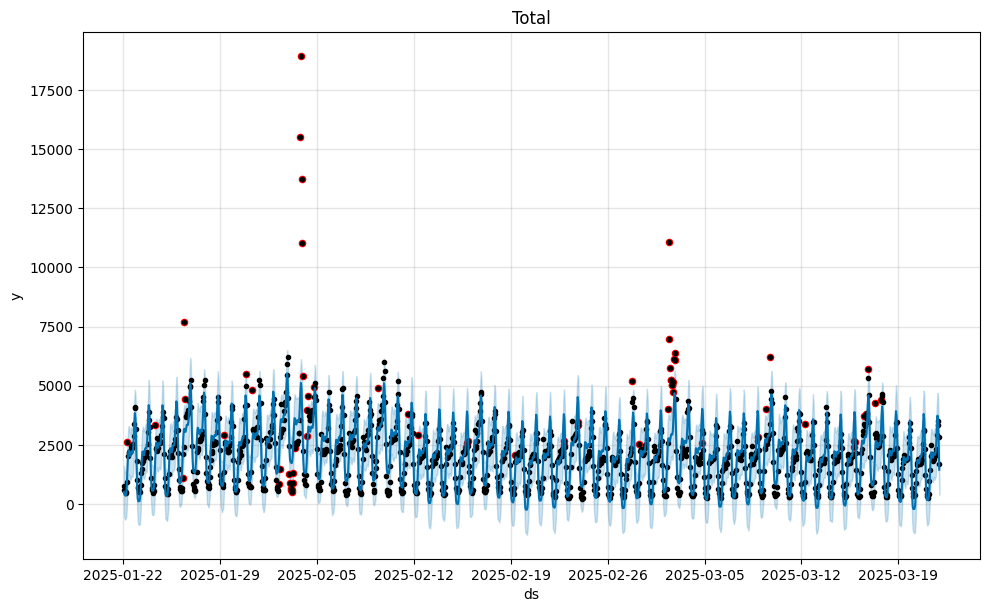

In [33]:
landing_page_viewers_top_level = prophet_model(landing_page_viewers, 'Total')
landing_page_viewers_top_level

18:01:10 - cmdstanpy - INFO - Chain [1] start processing
18:01:11 - cmdstanpy - INFO - Chain [1] done processing


ds   yhat_lower   yhat_upper         yhat     y  \
0    2025-01-22 01:00:00 -1028.230247  1223.828506   116.959765   830   
1    2025-01-22 02:00:00 -1229.375036   976.590094   -34.320410   743   
2    2025-01-22 03:00:00 -1101.221815  1099.278213    -7.415480   628   
3    2025-01-22 04:00:00 -1186.161002  1024.515730   -34.522541   564   
4    2025-01-22 05:00:00  -994.142584  1142.849622    43.326036   628   
...                  ...          ...          ...          ...   ...   
1410 2025-03-21 19:00:00  4448.126987  6641.988880  5556.737660  4646   
1411 2025-03-21 20:00:00  5233.709798  7412.338797  6256.516882  5892   
1412 2025-03-21 21:00:00  4941.827007  7100.899601  5936.765863  5221   
1413 2025-03-21 22:00:00  3375.969996  5682.159681  4531.147276  4476   
1414 2025-03-21 23:00:00  1520.193035  3712.818608  2643.684196  2761   

      is_anomaly        diff  percent_diff  
0              0  713.040235      0.859085  
1              0  777.320410      1.046192  
2              0  635.415480      1.011808  
3              0  598.522541      1.061210  
4              0  584.673964      0.931009  
...          ...         ...           ...  
1410           0  910.737660      0.196026  
1411           0  364.516882      0.061866  
1412           0  715.765863      0.137094  
1413           0   55.147276      0.012321  
1414           0  117.315804      0.042490  

[1415 rows x 8 columns]

<Figure size 3000x2000 with 0 Axes>

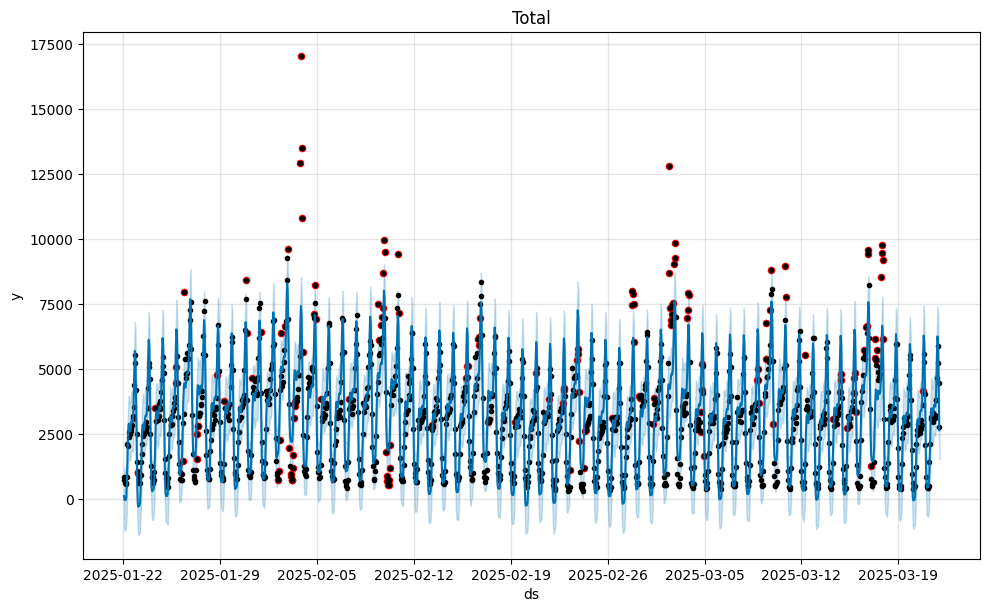

In [34]:
product_viewers_top_level = prophet_model(product_viewers, 'Total')
product_viewers_top_level

18:01:11 - cmdstanpy - INFO - Chain [1] start processing
18:01:11 - cmdstanpy - INFO - Chain [1] done processing


ds   yhat_lower   yhat_upper         yhat     y  \
0    2025-01-22 01:00:00  -576.318481   445.266617  -101.254186   211   
1    2025-01-22 02:00:00  -655.230370   378.838198  -124.852906   170   
2    2025-01-22 03:00:00  -625.591437   396.768850  -111.497212    93   
3    2025-01-22 04:00:00  -605.039254   351.203124  -128.094227   129   
4    2025-01-22 05:00:00  -639.528749   350.226706  -126.573402   118   
...                  ...          ...          ...          ...   ...   
1410 2025-03-21 19:00:00   917.164508  1951.664189  1462.427540  1309   
1411 2025-03-21 20:00:00  1128.384503  2136.458604  1626.391823  1527   
1412 2025-03-21 21:00:00  1072.107547  2009.602953  1539.829094  1390   
1413 2025-03-21 22:00:00   737.970874  1678.297524  1181.016898  1171   
1414 2025-03-21 23:00:00   172.090059  1204.379844   700.676070   687   

      is_anomaly        diff  percent_diff  
0              0  312.254186      1.479878  
1              0  294.852906      1.734429  
2              0  204.497212      2.198895  
3              0  257.094227      1.992979  
4              0  244.573402      2.072656  
...          ...         ...           ...  
1410           0  153.427540      0.117210  
1411           0   99.391823      0.065090  
1412           0  149.829094      0.107791  
1413           0   10.016898      0.008554  
1414           0   13.676070      0.019907  

[1415 rows x 8 columns]

<Figure size 3000x2000 with 0 Axes>

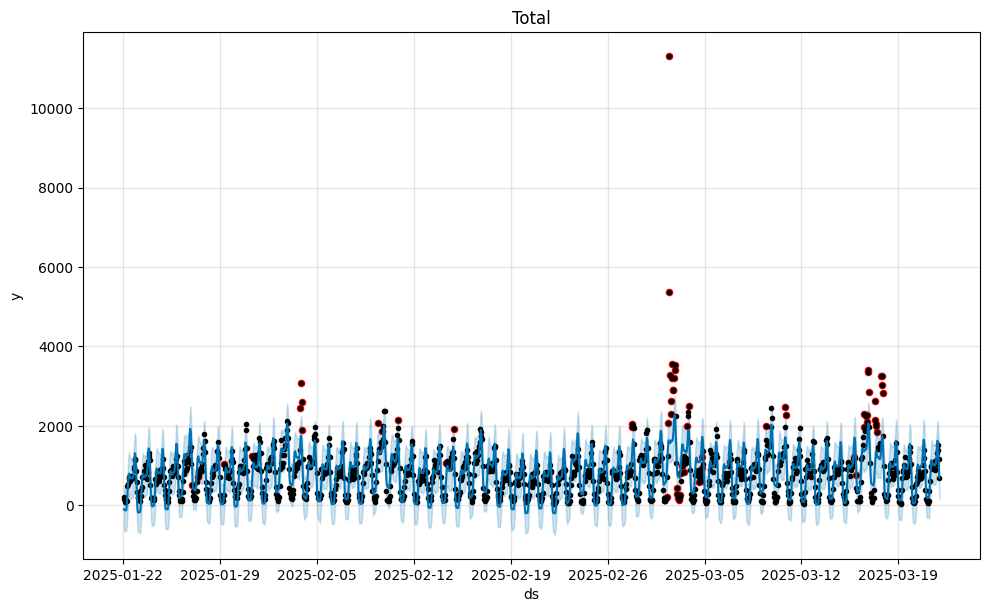

In [35]:
added_to_cart_top_level = prophet_model(added_to_cart, 'Total')
added_to_cart_top_level

18:01:11 - cmdstanpy - INFO - Chain [1] start processing
18:01:11 - cmdstanpy - INFO - Chain [1] done processing


ds  yhat_lower  yhat_upper        yhat    y  is_anomaly  \
0    2025-01-22 01:00:00 -148.622951   70.468923  -35.429996   36           0   
1    2025-01-22 02:00:00 -140.639314   67.576125  -42.549165   50           0   
2    2025-01-22 03:00:00 -147.787097   71.594555  -38.557777   15           0   
3    2025-01-22 04:00:00 -150.027506   71.669664  -40.748781   36           0   
4    2025-01-22 05:00:00 -146.433243   77.445953  -35.167657   35           0   
...                  ...         ...         ...         ...  ...         ...   
1410 2025-03-21 19:00:00  320.037864  536.594539  425.566936  362           0   
1411 2025-03-21 20:00:00  350.806621  579.574468  466.816553  409           0   
1412 2025-03-21 21:00:00  324.533550  541.989655  433.863879  381           0   
1413 2025-03-21 22:00:00  218.562956  448.441271  324.213884  276           0   
1414 2025-03-21 23:00:00   80.580702  296.841780  183.158263  159           0   

           diff  percent_diff  
0     71.429996      1.984167  
1     92.549165      1.850983  
2     53.557777      3.570518  
3     76.748781      2.131911  
4     70.167657      2.004790  
...         ...           ...  
1410  63.566936      0.175599  
1411  57.816553      0.141361  
1412  52.863879      0.138750  
1413  48.213884      0.174688  
1414  24.158263      0.151939  

[1415 rows x 8 columns]

<Figure size 3000x2000 with 0 Axes>

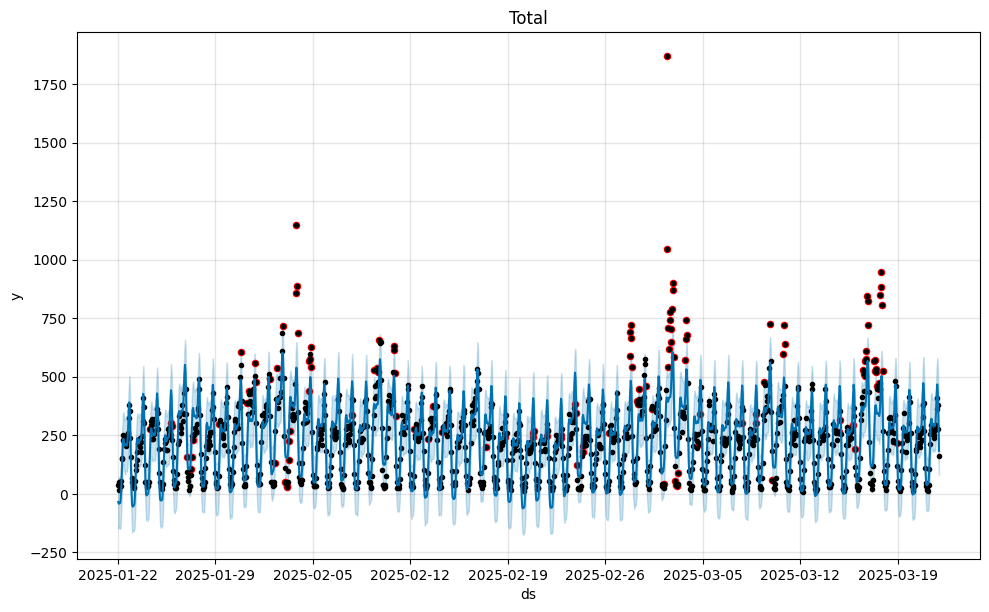

In [36]:
checkout_started_top_level = prophet_model(checkout_started, 'Total')
checkout_started_top_level

18:01:12 - cmdstanpy - INFO - Chain [1] start processing
18:01:12 - cmdstanpy - INFO - Chain [1] done processing


ds   yhat_lower   yhat_upper         yhat     y  \
0    2025-01-22 01:00:00  -530.976954  1566.196452   479.849054   773   
1    2025-01-22 02:00:00  -680.468957  1339.936315   355.974441   595   
2    2025-01-22 03:00:00  -744.816136  1427.731768   337.242725   552   
3    2025-01-22 04:00:00  -664.740185  1418.899987   317.547083   438   
4    2025-01-22 05:00:00  -514.682561  1450.129603   410.172454   510   
...                  ...          ...          ...          ...   ...   
1410 2025-03-21 19:00:00  2314.441539  4341.428034  3341.397301  2923   
1411 2025-03-21 20:00:00  2747.676920  4676.325112  3734.207959  3534   
1412 2025-03-21 21:00:00  2527.856679  4542.443714  3489.860896  3332   
1413 2025-03-21 22:00:00  1580.704803  3646.274321  2598.534847  2835   
1414 2025-03-21 23:00:00   428.693388  2445.564333  1442.888681  1687   

      is_anomaly        diff  percent_diff  
0              0  293.150946      0.379238  
1              0  239.025559      0.401724  
2              0  214.757275      0.389053  
3              0  120.452917      0.275007  
4              0   99.827546      0.195740  
...          ...         ...           ...  
1410           0  418.397301      0.143140  
1411           0  200.207959      0.056652  
1412           0  157.860896      0.047377  
1413           0  236.465153      0.083409  
1414           0  244.111319      0.144701  

[1415 rows x 8 columns]

<Figure size 3000x2000 with 0 Axes>

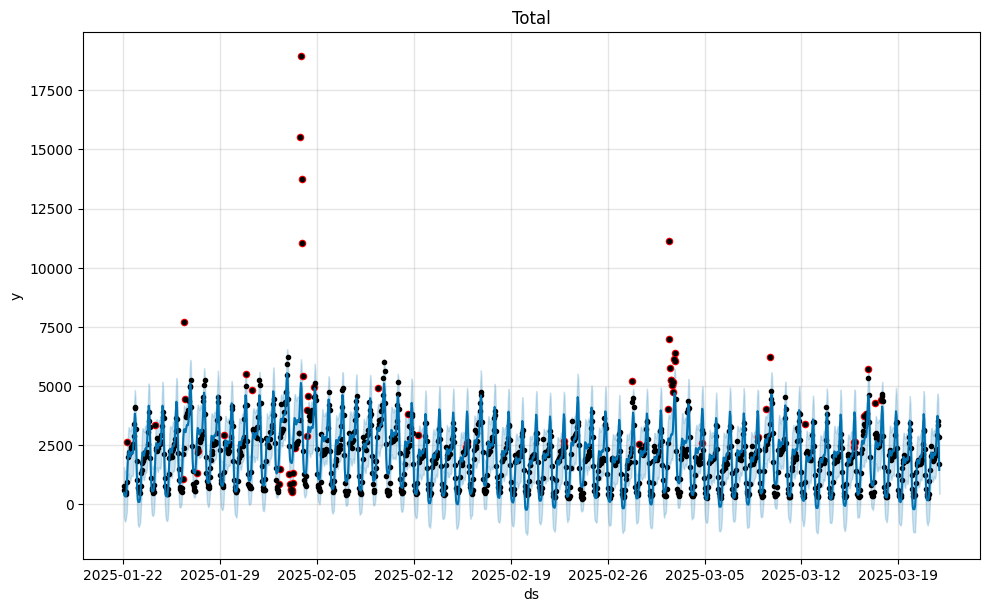

In [37]:
visitors_top_level = prophet_model(visitors, 'Total')
visitors_top_level

18:01:12 - cmdstanpy - INFO - Chain [1] start processing
18:01:12 - cmdstanpy - INFO - Chain [1] done processing


ds  yhat_lower  yhat_upper        yhat    y  is_anomaly  \
0    2025-01-22 01:00:00  -42.687641   13.120835  -14.476093    5           0   
1    2025-01-22 02:00:00  -40.655143   12.543108  -14.966972    8           0   
2    2025-01-22 03:00:00  -39.736910   12.955875  -13.384446    5           0   
3    2025-01-22 04:00:00  -41.213419   12.187897  -14.830044    4           0   
4    2025-01-22 05:00:00  -42.094991   11.320469  -14.659097    3           0   
...                  ...         ...         ...         ...  ...         ...   
1409 2025-03-21 19:00:00  106.307370  161.188590  133.173709  123           0   
1410 2025-03-21 20:00:00  116.430044  168.711071  143.243136  121           0   
1411 2025-03-21 21:00:00  107.651206  161.116022  132.062369  127           0   
1412 2025-03-21 22:00:00   73.375770  126.316772   99.515790   84           0   
1413 2025-03-21 23:00:00   28.917337   86.060665   59.080811   49           0   

           diff  percent_diff  
0     19.476093      3.895219  
1     22.966972      2.870872  
2     18.384446      3.676889  
3     18.830044      4.707511  
4     17.659097      5.886366  
...         ...           ...  
1409  10.173709      0.082713  
1410  22.243136      0.183828  
1411   5.062369      0.039861  
1412  15.515790      0.184712  
1413  10.080811      0.205731  

[1414 rows x 8 columns]

<Figure size 3000x2000 with 0 Axes>

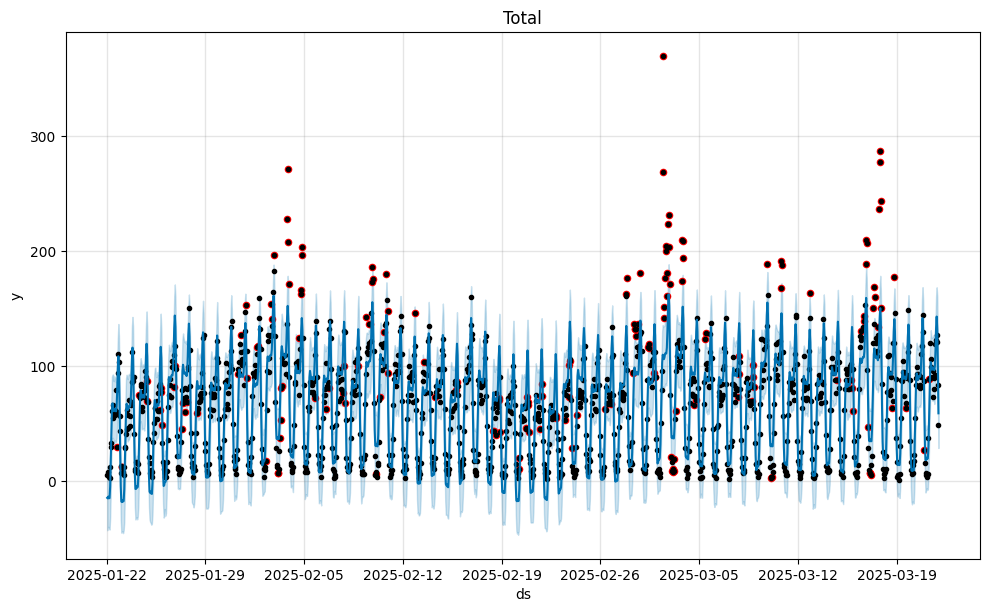

In [38]:
orders_top_level = prophet_model(orders, 'Total')
orders_top_level

18:01:12 - cmdstanpy - INFO - Chain [1] start processing
18:01:12 - cmdstanpy - INFO - Chain [1] done processing


ds  yhat_lower  yhat_upper        yhat    y  is_anomaly  \
0    2025-01-22 01:00:00  -38.423860   12.753625  -12.940637    5           0   
1    2025-01-22 02:00:00  -38.267252    9.907282  -13.300558    8           0   
2    2025-01-22 03:00:00  -39.206173   14.252488  -11.765595    5           0   
3    2025-01-22 04:00:00  -38.591596   12.489122  -13.169861    4           0   
4    2025-01-22 05:00:00  -38.588154   10.489557  -13.011322    3           0   
...                  ...         ...         ...         ...  ...         ...   
1409 2025-03-21 19:00:00  101.091405  150.169778  125.571935  110           0   
1410 2025-03-21 20:00:00  108.750370  161.162321  135.660598  113           0   
1411 2025-03-21 21:00:00  101.029999  150.968600  125.220187  123           0   
1412 2025-03-21 22:00:00   68.985078  120.125396   94.178341   80           0   
1413 2025-03-21 23:00:00   28.653158   81.992809   55.568243   46           0   

           diff  percent_diff  
0     17.940637      3.588127  
1     21.300558      2.662570  
2     16.765595      3.353119  
3     17.169861      4.292465  
4     16.011322      5.337107  
...         ...           ...  
1409  15.571935      0.141563  
1410  22.660598      0.200536  
1411   2.220187      0.018050  
1412  14.178341      0.177229  
1413   9.568243      0.208005  

[1414 rows x 8 columns]

<Figure size 3000x2000 with 0 Axes>

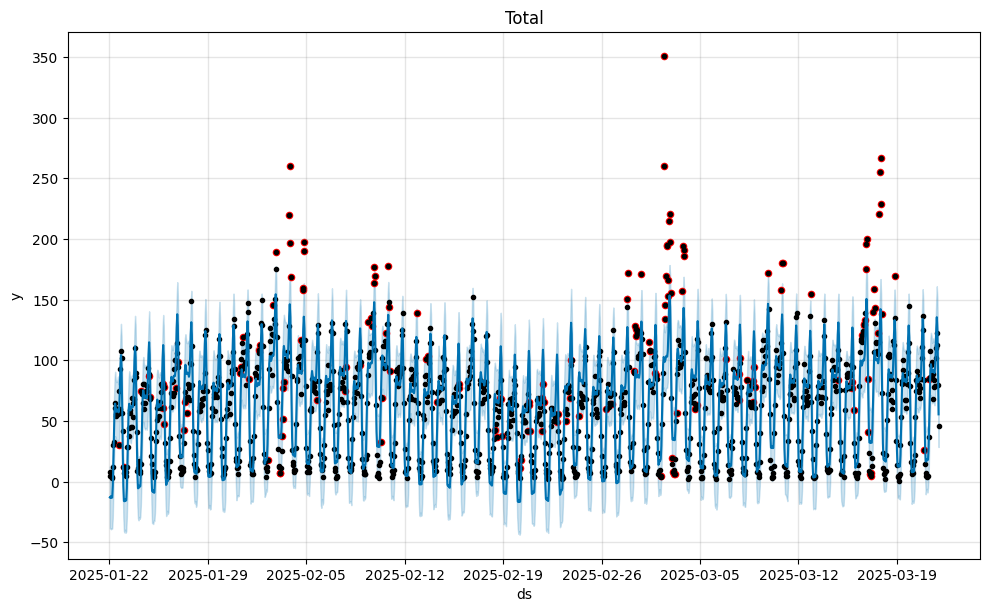

In [39]:
buyers_top_level = prophet_model(buyers, 'Total')
buyers_top_level

In [40]:
# Create a DataFrame with all hours and anomalies
all_hours = pd.date_range(start='2025-01-22 01:00:00', end='2025-03-21 23:00:00', freq='H')
anomaly_df = pd.DataFrame({'hour': all_hours})

# Add anomaly information from each model
models = {
    'landing_page_viewers': landing_page_viewers_top_level,
    'product_viewers': product_viewers_top_level,
    'added_to_cart': added_to_cart_top_level,
    'checkout_started': checkout_started_top_level,
    'visitors': visitors_top_level,
    'orders': orders_top_level,
    'buyers': buyers_top_level
}

# For each model, add a column indicating if there was an anomaly
for model_name, model_data in models.items():
    # Ensure the data length matches the DataFrame length
    if len(model_data['is_anomaly']) < len(anomaly_df):
        # Pad with zeros (assuming no anomaly) for the missing values
        padded_data = np.pad(model_data['is_anomaly'], (0, len(anomaly_df) - len(model_data['is_anomaly'])), 
                           mode='constant', constant_values=0)
        anomaly_df[f'{model_name}_anomaly'] = padded_data
    else:
        anomaly_df[f'{model_name}_anomaly'] = model_data['is_anomaly'].values

# Create a single column with list of event names that had anomalies at each hour
anomaly_df['event_names'] = anomaly_df.apply(
    lambda row: [metric for metric in models.keys() if row[f'{metric}_anomaly'] == 1],
    axis=1
)

# Drop the individual anomaly columns since we only need the event_names
anomaly_df = anomaly_df[['hour', 'event_names']]

# Display the first few rows of the combined DataFrame
anomaly_df

/var/folders/3w/6r6rgq7n68s6ly8lwqm2rc2r0000gn/T/ipykernel_15067/3624382450.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  all_hours = pd.date_range(start='2025-01-22 01:00:00', end='2025-03-21 23:00:00', freq='H')


hour event_names
0    2025-01-22 01:00:00          []
1    2025-01-22 02:00:00          []
2    2025-01-22 03:00:00          []
3    2025-01-22 04:00:00          []
4    2025-01-22 05:00:00          []
...                  ...         ...
1410 2025-03-21 19:00:00          []
1411 2025-03-21 20:00:00          []
1412 2025-03-21 21:00:00          []
1413 2025-03-21 22:00:00          []
1414 2025-03-21 23:00:00          []

[1415 rows x 2 columns]

In [41]:
!pip install plotly
!pip install plotly-express
!pip install mplcursors

In [42]:
!pip install --upgrade nbformat

In [43]:
def plot_visitors_anomalies(anomaly_df, visitors_df, start_date, end_date):
    """
    Plot visitors and anomalies for a date range.
    
    Parameters:
    -----------
    anomaly_df : pandas DataFrame
        DataFrame containing anomaly information with 'hour' and 'event_names' columns
    visitors_df : pandas DataFrame
        DataFrame containing visitor information with 'ds' and 'y' columns
    start_date : str or datetime
        The start date (e.g., '2025-02-15')
    end_date : str or datetime
        The end date (e.g., '2025-02-16')
    """
    import plotly.express as px
    
    # Convert dates to datetime if they're strings
    start_time = pd.to_datetime(start_date).replace(hour=0, minute=0, second=0)
    end_time = pd.to_datetime(end_date).replace(hour=23, minute=59, second=59)
    
    # Filter data for the date range
    filtered_visitors = visitors_df[
        (visitors_df['ds'] >= start_time) & 
        (visitors_df['ds'] <= end_time)
    ].copy()
    
    filtered_anomalies = anomaly_df[
        (anomaly_df['hour'] >= start_time) & 
        (anomaly_df['hour'] <= end_time)
    ].copy()
    
    # Create the figure
    fig = px.line(filtered_visitors, x='ds', y='y',
                  title=f"Visitors and Anomalies from {start_time.strftime('%Y-%m-%d')} to {end_time.strftime('%Y-%m-%d')}",
                  labels={"y": "Number of Visitors", "ds": "Time"})
    
    # Add highlighted regions for hours with anomalies
    for idx, row in filtered_anomalies.iterrows():
        if row['event_names']:  # If there are any anomalies in this hour
            fig.add_vrect(
                x0=row['hour'] - pd.Timedelta(hours=0.5),
                x1=row['hour'] + pd.Timedelta(hours=0.5),
                fillcolor="red",
                opacity=0.3,
                line_width=0
            )
    
    # Update layout
    fig.update_layout(
        xaxis_title="Time",
        yaxis_title="Number of Visitors",
        hovermode="x unified",
        showlegend=False
    )
    
    # Update hover template
    fig.update_traces(
        hovertemplate="<b>Time:</b> %{x}<br>" +
                      "<b>Visitors:</b> %{y:,.0f}<br>" +
                      "<b>Anomalies:</b> %{customdata}<extra></extra>",
        customdata=filtered_anomalies['event_names']
    )
    
    # Show the figure
    fig.show()

# Example usage:
plot_visitors_anomalies(anomaly_df, visitors_top_level, '2025-02-02', '2025-02-09')

In [ ]:
import plotly.express as px

# Create a Plotly figure for total visitors
fig = px.line(visitors_top_level, x='ds', y='y',
              title="Total Visitors Over Time with Anomalies",
              labels={"y": "Number of Visitors", "ds": "Time"})

# Add highlighted regions for hours with anomalies
for idx, row in anomaly_df.iterrows():
    if row['event_names']:  # If there are any anomalies in this hour
        fig.add_vrect(x0=row['hour'] - pd.Timedelta(hours=0.5), 
                     x1=row['hour'] + pd.Timedelta(hours=0.5),
                     fillcolor="red", 
                     opacity=0.3, 
                     line_width=0)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Number of Visitors",
    hovermode="x unified",
    showlegend=False
)

# Update hover template to show anomaly information
fig.update_traces(
    hovertemplate="<b>Time:</b> %{x}<br>" +
                  "<b>Visitors:</b> %{y}<br>" +
                  "<b>Anomalies:</b> %{customdata}<extra></extra>",
    customdata=anomaly_df['event_names']
)

# Show the figure
fig.show()

In [45]:
# Check lengths of each model's data
print("Length of all_hours:", len(all_hours))
for model_name, model_data in models.items():
    print(f"Length of {model_name}:", len(model_data['is_anomaly']))

Length of all_hours: 1415
Length of landing_page_viewers: 1415
Length of product_viewers: 1415
Length of added_to_cart: 1415
Length of checkout_started: 1415
Length of visitors: 1415
Length of orders: 1414
Length of buyers: 1414


## Anomaly Contributions

In [58]:
def anomaly_contribution(site_visits_top_level,site_visits_bottom_level, dimension_list):
  site_visits_top_level_new = site_visits_top_level.copy()
  site_visits_top_level_new["pred added"] = 0
  site_visits_top_level_new["diff added"] = 0
  site_visits_top_level_new["diff sign added"] = 0

  for dimension in dimension_list:
    data_curr = prophet_model(site_visits_bottom_level, dimension)
    site_visits_top_level_new["pred "+dimension] = data_curr['yhat']
    site_visits_top_level_new["diff "+dimension] = data_curr['diff']
    site_visits_top_level_new['percent_diff ' + dimension] = data_curr['percent_diff']


    #Aggregated anomaly weights by dimension for verification with total anomaly weight found at top level
    site_visits_top_level_new["pred added"] += site_visits_top_level_new["pred "+dimension]
    site_visits_top_level_new["diff added"] += site_visits_top_level_new["diff "+dimension]


  for dimension in dimension_list:
    site_visits_top_level_new["perc diff "+dimension] = site_visits_top_level_new["diff "+dimension]/site_visits_top_level_new["diff added"]
    print(dimension + " added!")
  return site_visits_top_level_new

In [59]:
def anomaly_percents(site_visits_top_levell,site_visits_bottom_level, geo_list):
  site_visits_top_level_new = site_visits_top_levell.copy()
  for geo in geo_list:
    data_curr = prophet_model(site_visits_bottom_level, geo)
    # site_visits_top_level_new["diff "+geo] = data_curr['diff']
    site_visits_top_level_new["percent_diff "+geo] = data_curr['percent_diff']
  return site_visits_top_level_new

18:18:09 - cmdstanpy - INFO - Chain [1] start processing
18:18:09 - cmdstanpy - INFO - Chain [1] done processing
18:18:09 - cmdstanpy - INFO - Chain [1] start processing
18:18:09 - cmdstanpy - INFO - Chain [1] done processing


ds   yhat_lower   yhat_upper         yhat     y  \
6   2025-01-22 07:00:00   289.428469  2334.003882  1367.725865  2630   
54  2025-01-24 07:00:00   662.836717  2674.950955  1659.140752  3328   
102 2025-01-26 07:00:00  1127.261695  3124.864557  2151.981316  1077   
105 2025-01-26 10:00:00  2186.418737  4141.453570  3168.680914  7715   
106 2025-01-26 11:00:00  2034.358474  4060.587578  3054.862507  4461   

     is_anomaly         diff  percent_diff  percent_diff Global  \
6             1  1262.274135      0.479952             0.525244   
54            1  1668.859248      0.501460             0.535034   
102           1  1074.981316      0.998126             1.039615   
105           1  4546.319086      0.589283             0.608616   
106           1  1406.137493      0.315207             0.346378   

     percent_diff US  
6           0.050987  
54          0.333185  
102         0.833827  
105         2.096091  
106         1.958497

<Figure size 3000x2000 with 0 Axes>

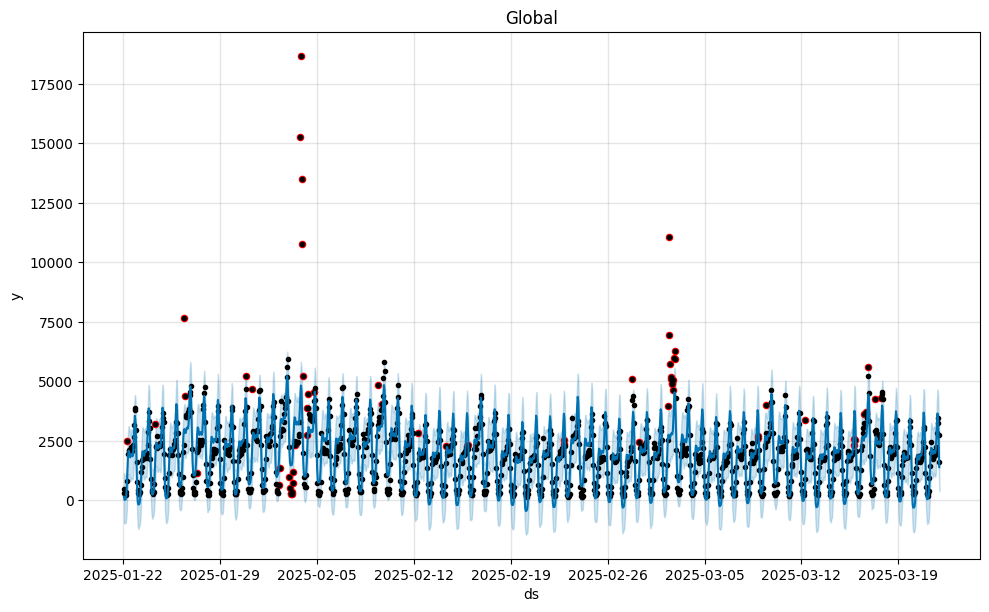

<Figure size 3000x2000 with 0 Axes>

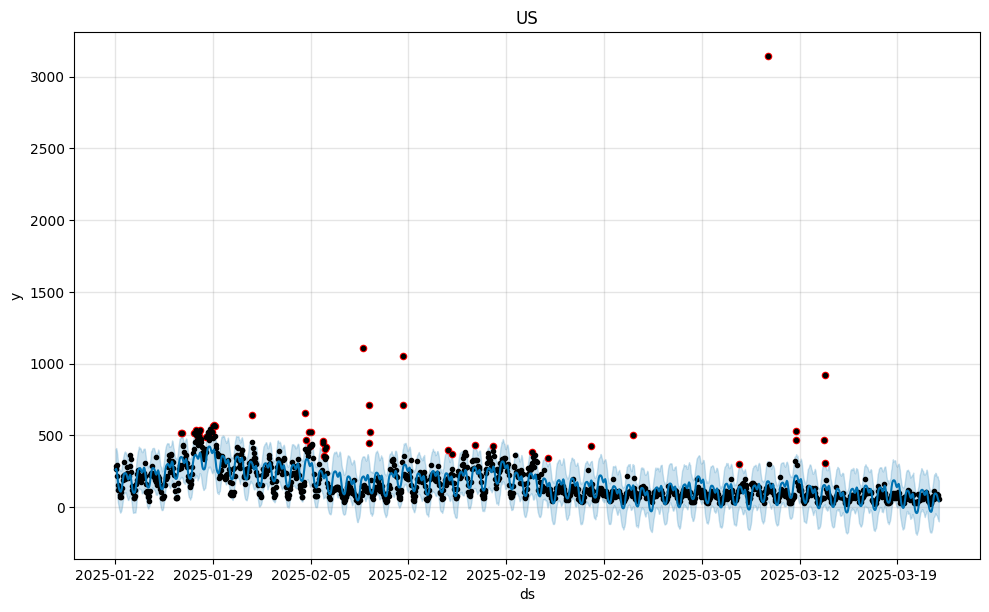

In [62]:
geo_list = ["Global", "US"]
visitors_contributions = anomaly_percents(visitors_top_level,visitors_by_geography, geo_list)
visitors_geo_contributions = visitors_contributions[visitors_contributions["is_anomaly"] == 1]
visitors_geo_contributions.head()

18:18:16 - cmdstanpy - INFO - Chain [1] start processing
18:18:16 - cmdstanpy - INFO - Chain [1] done processing
18:18:16 - cmdstanpy - INFO - Chain [1] start processing
18:18:16 - cmdstanpy - INFO - Chain [1] done processing


ds  yhat_lower  yhat_upper        yhat   y  is_anomaly  \
16 2025-01-22 17:00:00   37.579467   90.859424   64.809626  30           1   
25 2025-01-23 02:00:00  -43.928048    8.443244  -18.102821  12           1   
26 2025-01-23 03:00:00  -43.887901   11.885069  -16.402208  12           1   
54 2025-01-24 07:00:00    1.130534   55.809636   27.887459  75           1   
67 2025-01-24 20:00:00   93.276642  147.732780  119.594452  87           1   

         diff  percent_diff  percent_diff Global  percent_diff US  
16  34.809626      1.160321             1.153139         1.566284  
25  30.102821      2.508568             6.749738         0.317472  
26  28.402208      2.366851             4.509102         0.131071  
54  47.112541      0.628167             0.638584         0.222445  
67  32.594452      0.374649             0.418319         0.150053

<Figure size 3000x2000 with 0 Axes>

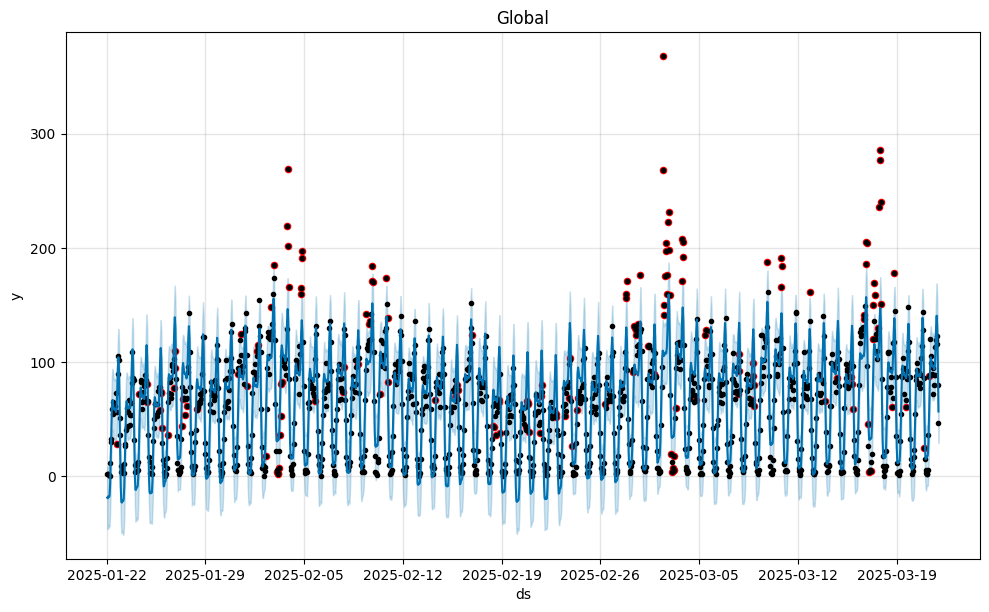

<Figure size 3000x2000 with 0 Axes>

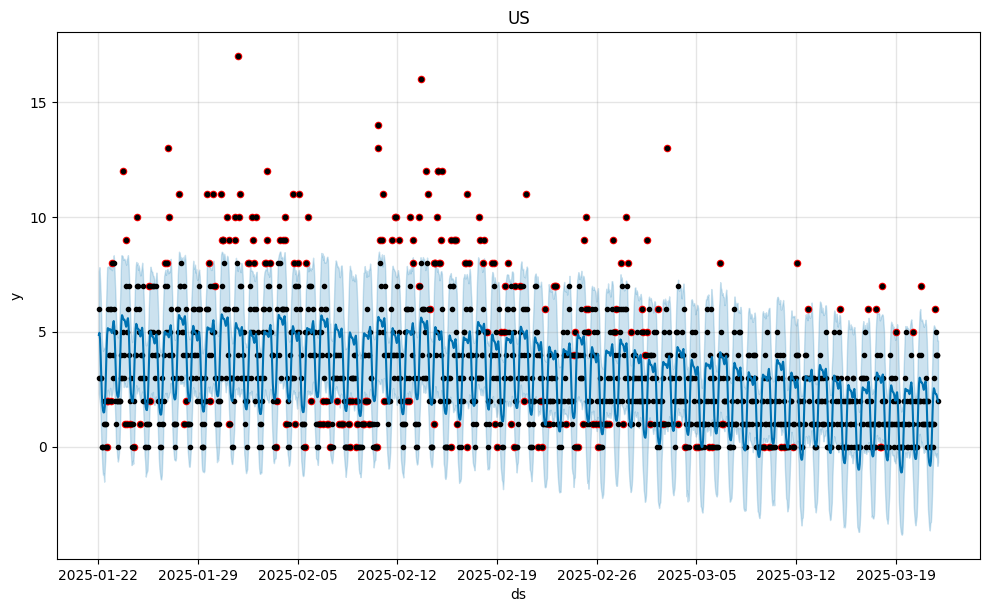

In [63]:
orders_contributions = anomaly_percents(orders_top_level,orders_by_geography, geo_list)
orders_geo_contributions = orders_contributions[orders_contributions["is_anomaly"] == 1]
orders_geo_contributions.head()

18:18:17 - cmdstanpy - INFO - Chain [1] start processing
18:18:17 - cmdstanpy - INFO - Chain [1] done processing
18:18:17 - cmdstanpy - INFO - Chain [1] start processing
18:18:17 - cmdstanpy - INFO - Chain [1] done processing


ds  yhat_lower  yhat_upper        yhat   y  is_anomaly  \
16 2025-01-22 17:00:00   35.788823   87.084856   61.127606  30           1   
25 2025-01-23 02:00:00  -41.826471    9.438302  -16.093078  12           1   
54 2025-01-24 07:00:00    1.962403   53.081529   27.652228  75           1   
67 2025-01-24 20:00:00   89.625481  140.499786  114.983467  87           1   
68 2025-01-24 21:00:00   79.432452  130.362096  104.620205  70           1   

         diff  percent_diff  percent_diff Global  percent_diff US  
16  31.127606      1.037587             1.018953         1.412559  
25  28.093078      2.341090             6.280296         0.347029  
54  47.347772      0.631304             0.644849         0.263586  
67  27.983467      0.321649             0.360006         0.180110  
68  34.620205      0.494574             0.535669         0.020800

<Figure size 3000x2000 with 0 Axes>

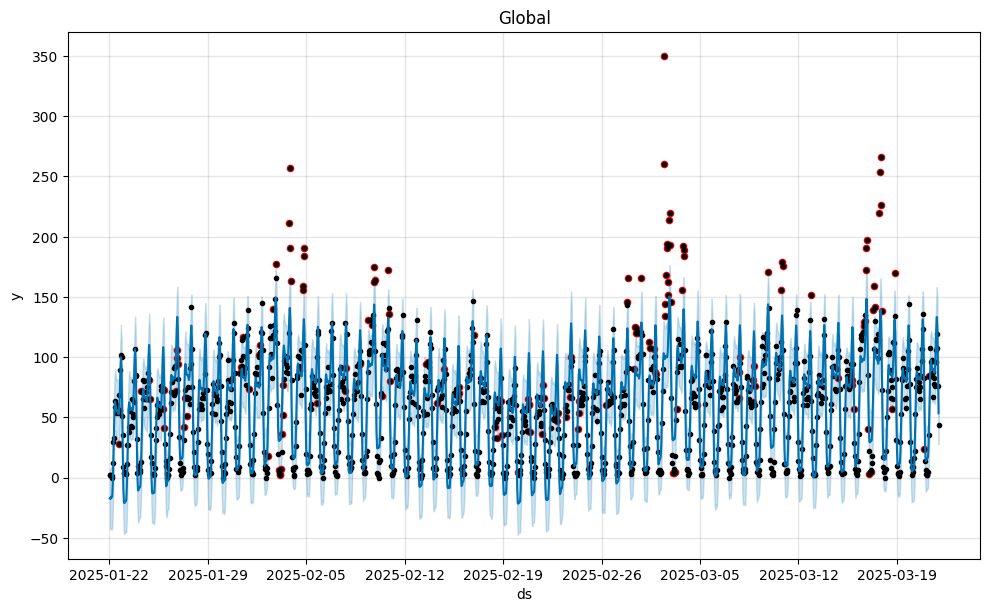

<Figure size 3000x2000 with 0 Axes>

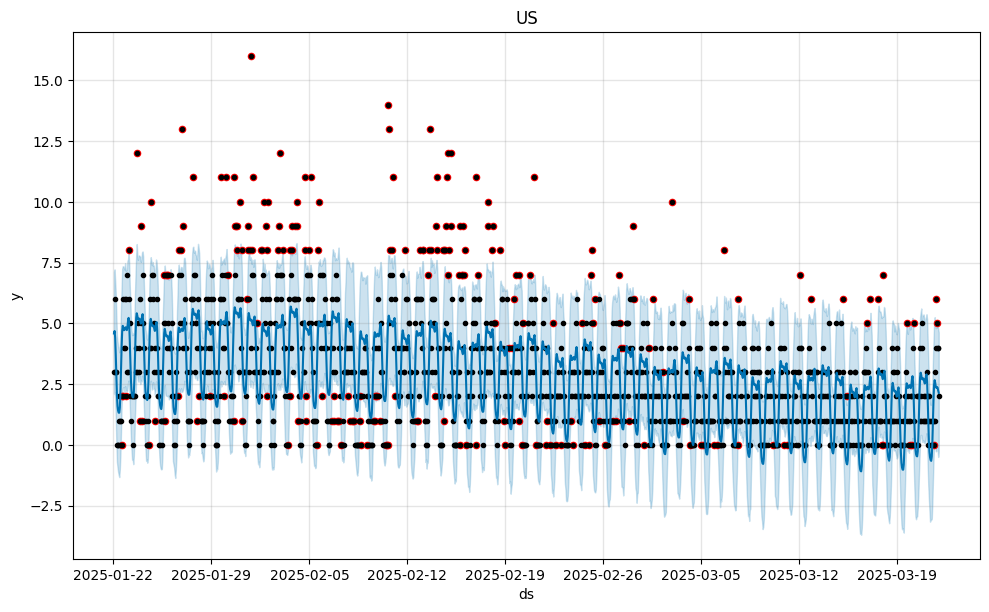

In [64]:
buyers_contributions = anomaly_percents(buyers_top_level,buyers_by_geography, geo_list)
buyers_geo_contributions = buyers_contributions[buyers_contributions["is_anomaly"] == 1]
buyers_geo_contributions.head()

In [65]:
devices = ["Android",	"Linux", "macOS",	"Other",	"Windows",	"iOS"]

18:18:19 - cmdstanpy - INFO - Chain [1] start processing
18:18:20 - cmdstanpy - INFO - Chain [1] done processing
18:18:20 - cmdstanpy - INFO - Chain [1] start processing
18:18:20 - cmdstanpy - INFO - Chain [1] done processing
18:18:20 - cmdstanpy - INFO - Chain [1] start processing
18:18:20 - cmdstanpy - INFO - Chain [1] done processing
18:18:20 - cmdstanpy - INFO - Chain [1] start processing
18:18:20 - cmdstanpy - INFO - Chain [1] done processing
18:18:20 - cmdstanpy - INFO - Chain [1] start processing
18:18:21 - cmdstanpy - INFO - Chain [1] done processing
18:18:21 - cmdstanpy - INFO - Chain [1] start processing
18:18:21 - cmdstanpy - INFO - Chain [1] done processing


Android added!
Linux added!
macOS added!
Other added!
Windows added!
iOS added!


ds   yhat_lower   yhat_upper         yhat     y  \
6   2025-01-22 07:00:00   289.428469  2334.003882  1367.725865  2630   
54  2025-01-24 07:00:00   662.836717  2674.950955  1659.140752  3328   
102 2025-01-26 07:00:00  1127.261695  3124.864557  2151.981316  1077   
105 2025-01-26 10:00:00  2186.418737  4141.453570  3168.680914  7715   
106 2025-01-26 11:00:00  2034.358474  4060.587578  3054.862507  4461   

     is_anomaly         diff  percent_diff   pred added   diff added  ...  \
6             1  1262.274135      0.479952  1309.522288  1331.372964  ...   
54            1  1668.859248      0.501460  1644.688376  1689.113334  ...   
102           1  1074.981316      0.998126  2179.681945  1102.681945  ...   
105           1  4546.319086      0.589283  3198.619269  4675.144518  ...   
106           1  1406.137493      0.315207  3085.494961  1564.179970  ...   

     percent_diff Windows     pred iOS     diff iOS  percent_diff iOS  \
6                0.735279   920.558784   598.441216          0.393971   
54               0.706818  1129.844085  1010.155915          0.472035   
102              3.994104  1571.100704   742.100704          0.895176   
105              0.572113  2300.429502  3672.570498          0.614862   
106              0.122191  2214.780104  1256.219896          0.361919   

     perc diff Android  perc diff Linux  perc diff macOS  perc diff Other  \
6             0.083674         0.256253         0.004092         0.001045   
54            0.137611         0.112623         0.008990         0.001717   
102           0.170170         0.082163         0.022337         0.019734   
105           0.136940         0.014610         0.019411         0.002369   
106           0.104085         0.044577         0.032487         0.005969   

     perc diff Windows  perc diff iOS  
6             0.205445       0.449492  
54            0.141019       0.598039  
102           0.032600       0.672996  
105           0.041117       0.785552  
106           0.009765       0.803117  

[5 rows x 35 columns]

<Figure size 3000x2000 with 0 Axes>

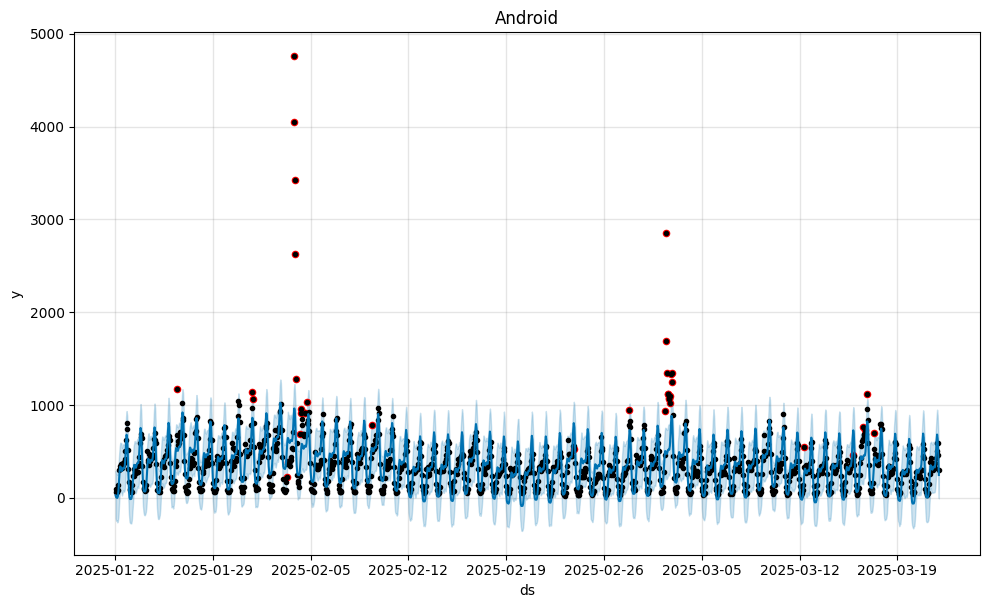

<Figure size 3000x2000 with 0 Axes>

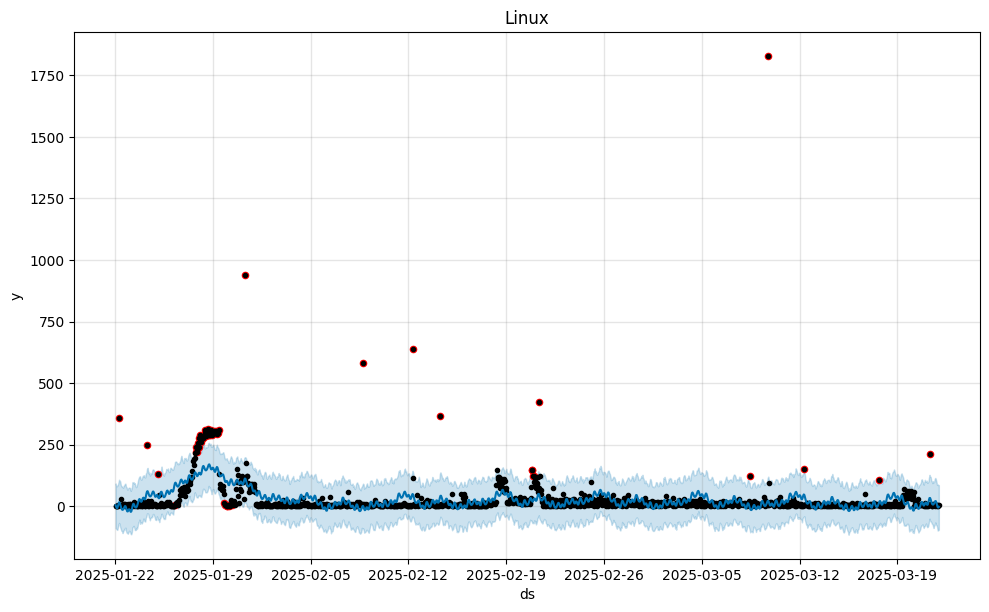

<Figure size 3000x2000 with 0 Axes>

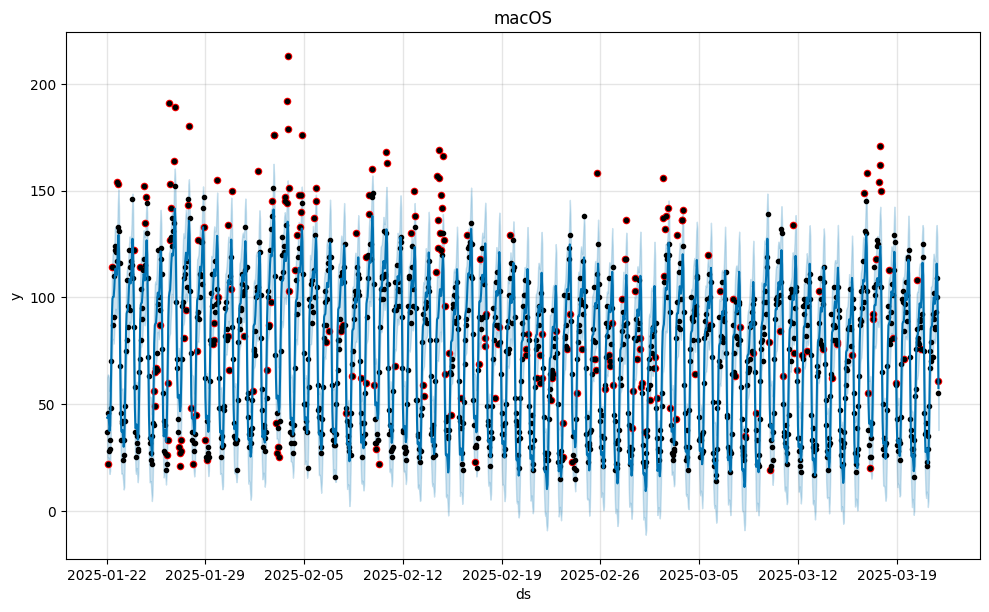

<Figure size 3000x2000 with 0 Axes>

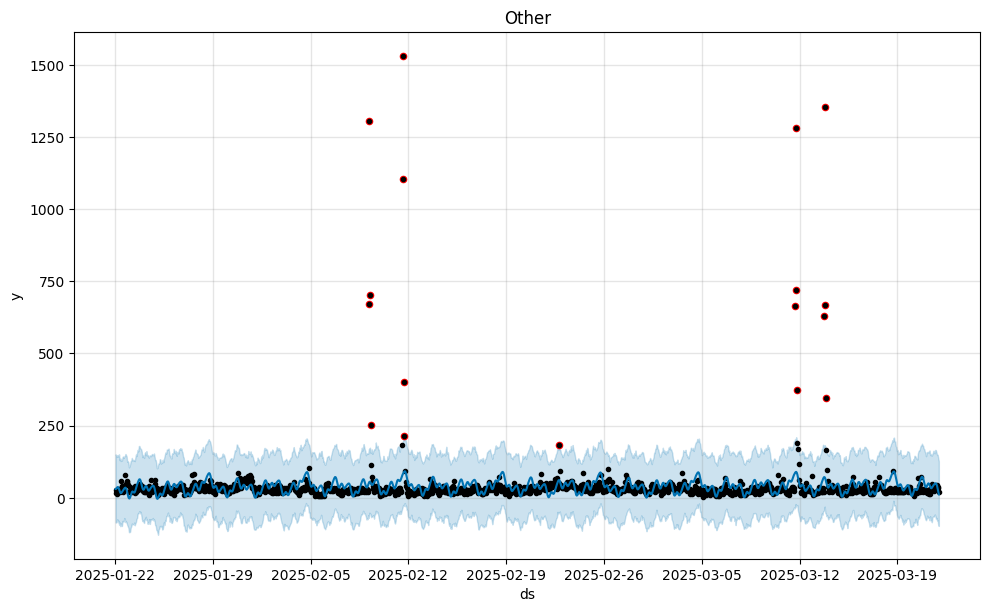

<Figure size 3000x2000 with 0 Axes>

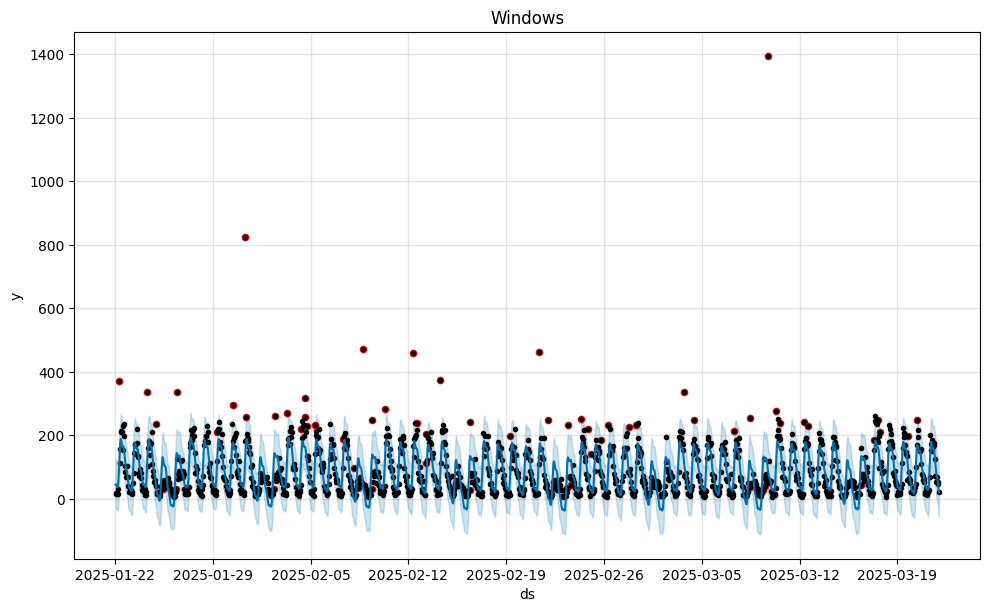

<Figure size 3000x2000 with 0 Axes>

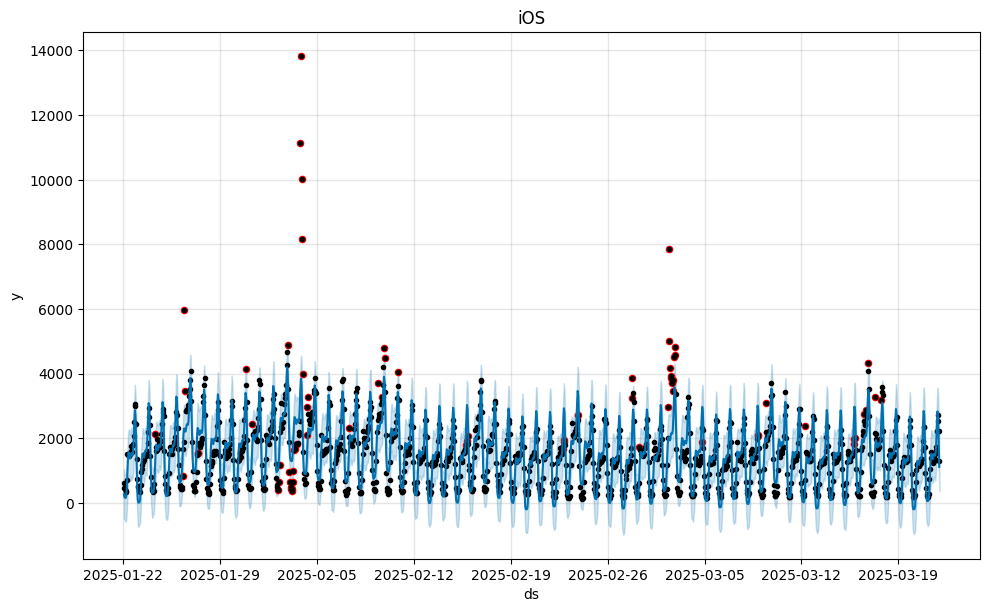

In [66]:
visitors_contribution_dev = anomaly_contribution(visitors_top_level,visitors_by_device, devices)
visitors_contributions_device = visitors_contribution_dev[visitors_contribution_dev["is_anomaly"] == 1]
visitors_contributions_device.head()

18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:23 - cmdstanpy - INFO - Chain [1] start processing
18:18:23 - cmdstanpy - INFO - Chain [1] done processing
18:18:23 - cmdstanpy - INFO - Chain [1] start processing
18:18:23 - cmdstanpy - INFO - Chain [1] done processing
18:18:23 - cmdstanpy - INFO - Chain [1] start processing
18:18:23 - cmdstanpy - INFO - Chain [1] done processing
18:18:23 - cmdstanpy - INFO - Chain [1] start processing
18:18:23 - cmdstanpy - INFO - Chain [1] done processing


Android added!
Linux added!
macOS added!
Other added!
Windows added!
iOS added!


ds  yhat_lower  yhat_upper        yhat   y  is_anomaly  \
16 2025-01-22 17:00:00   37.579467   90.859424   64.809626  30           1   
25 2025-01-23 02:00:00  -43.928048    8.443244  -18.102821  12           1   
26 2025-01-23 03:00:00  -43.887901   11.885069  -16.402208  12           1   
54 2025-01-24 07:00:00    1.130534   55.809636   27.887459  75           1   
67 2025-01-24 20:00:00   93.276642  147.732780  119.594452  87           1   

         diff  percent_diff  pred added  diff added  ...  \
16  34.809626      1.160321   65.930351   35.930351  ...   
25  30.102821      2.508568  -17.079433   30.643876  ...   
26  28.402208      2.366851  -15.385348   29.020714  ...   
54  47.112541      0.628167   28.752737   51.295504  ...   
67  32.594452      0.374649  120.363699   36.548320  ...   

    percent_diff Windows   pred iOS   diff iOS  percent_diff iOS  \
16              4.163500  43.953005  20.953005          0.911000   
25                   NaN -13.983263  23.983263          2.398326   
26                   NaN -13.081739  22.081739          2.453527   
54                   NaN  20.476289  42.523711          0.674980   
67              0.182307  89.432321  23.432321          0.355035   

    perc diff Android  perc diff Linux  perc diff macOS  perc diff Other  \
16           0.152503         0.001896         0.142206         0.004361   
25           0.191829         0.000702         0.007183         0.000123   
26           0.193345         0.001024         0.017583         0.000169   
54           0.114957         0.001316         0.006713         0.000128   
67           0.292843         0.023615         0.014240         0.008217   

    perc diff Windows  perc diff iOS  
16           0.115877       0.583156  
25           0.017518       0.782645  
26           0.026983       0.760896  
54           0.047891       0.828995  
67           0.019952       0.641133  

[5 rows x 35 columns]

<Figure size 3000x2000 with 0 Axes>

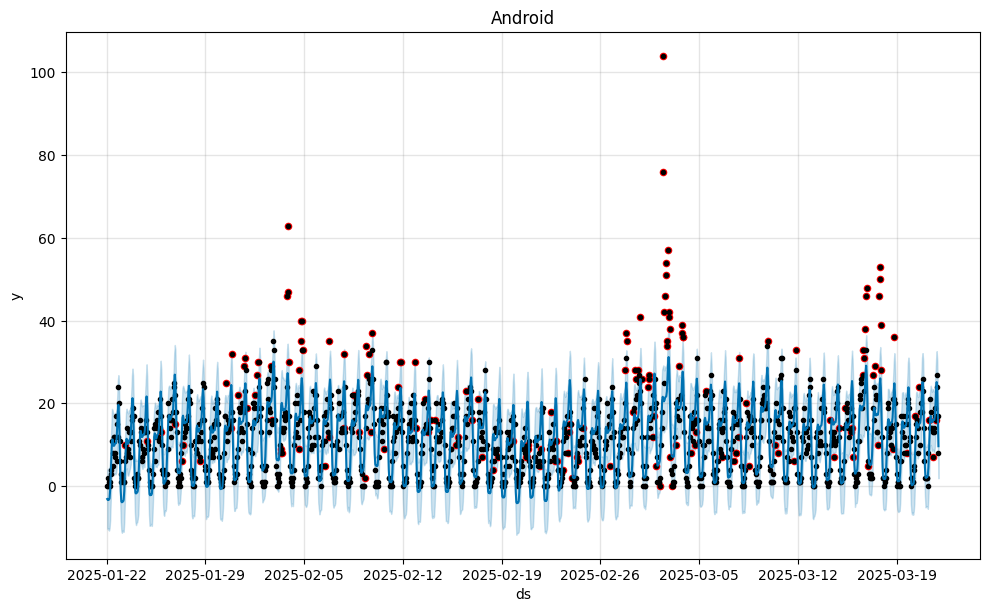

<Figure size 3000x2000 with 0 Axes>

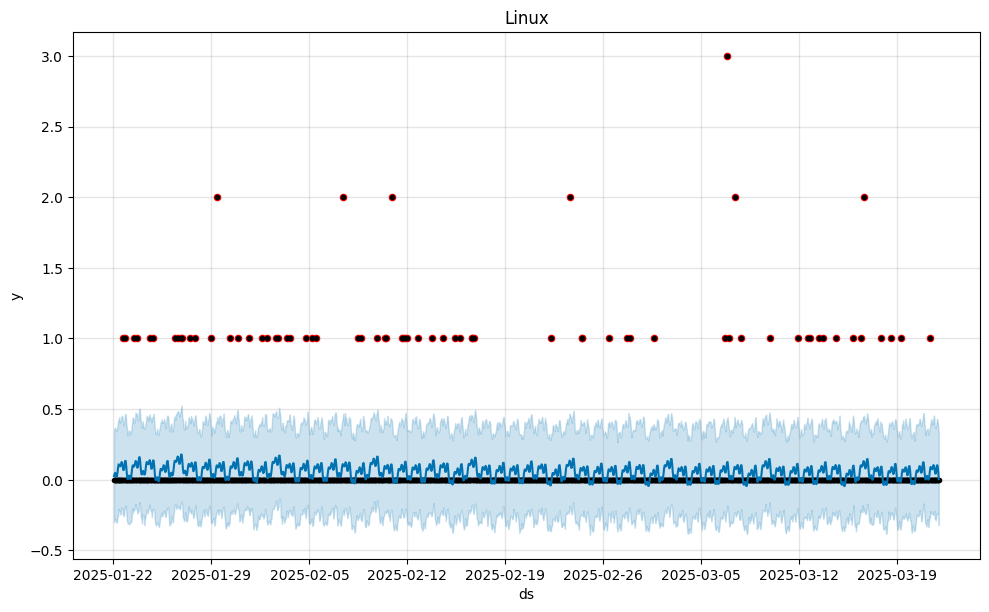

<Figure size 3000x2000 with 0 Axes>

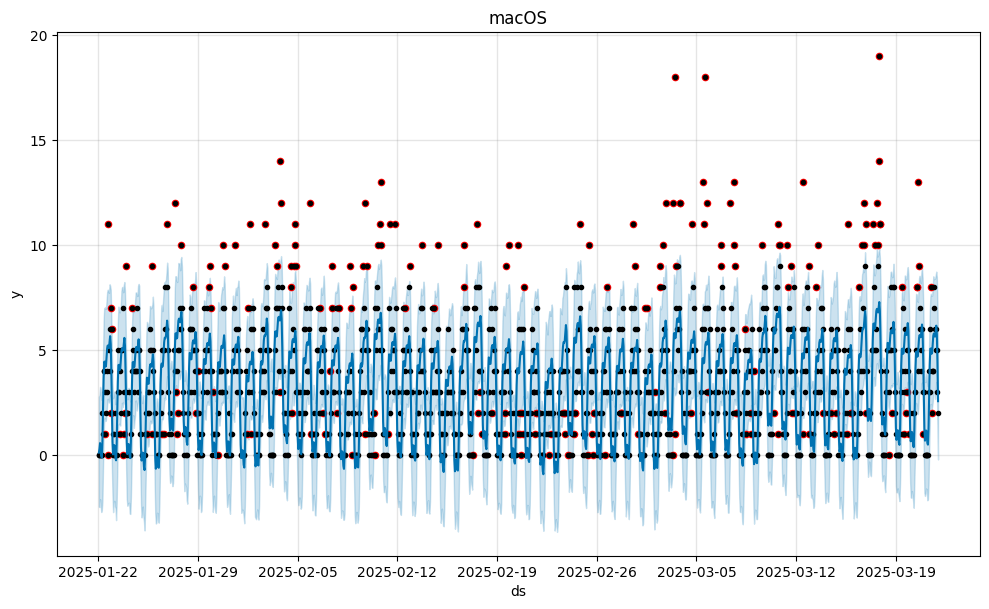

<Figure size 3000x2000 with 0 Axes>

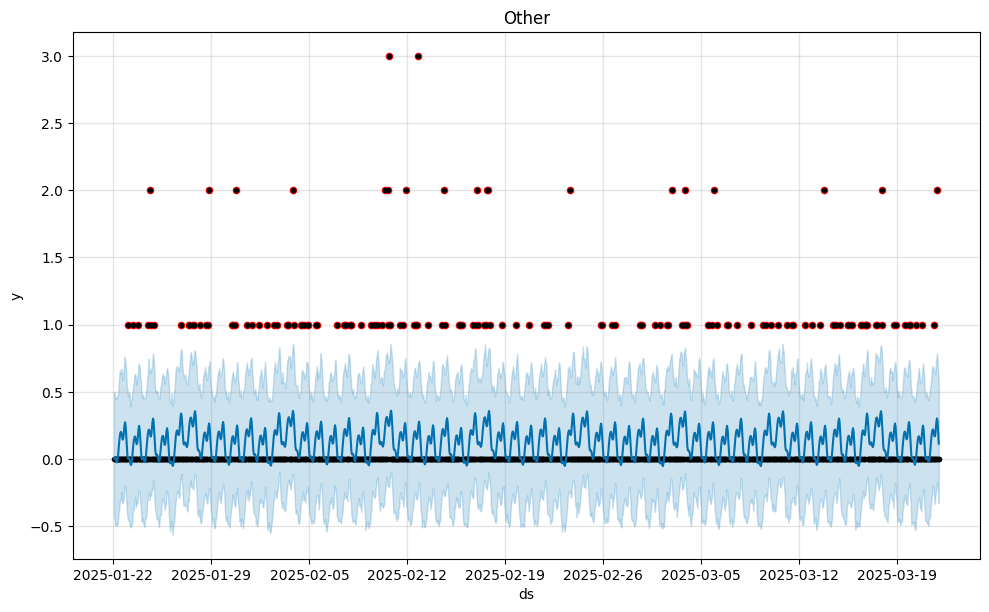

<Figure size 3000x2000 with 0 Axes>

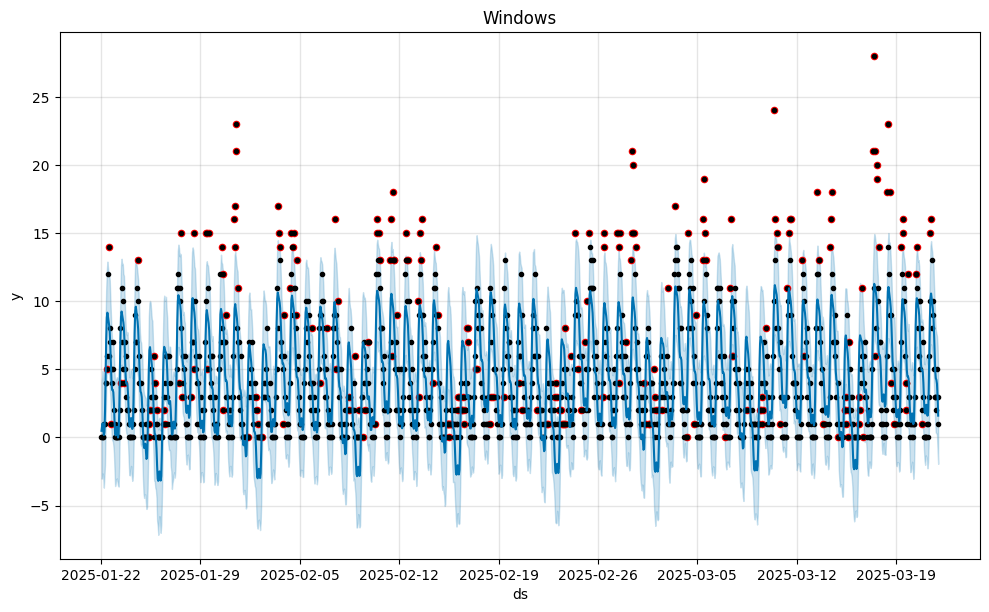

<Figure size 3000x2000 with 0 Axes>

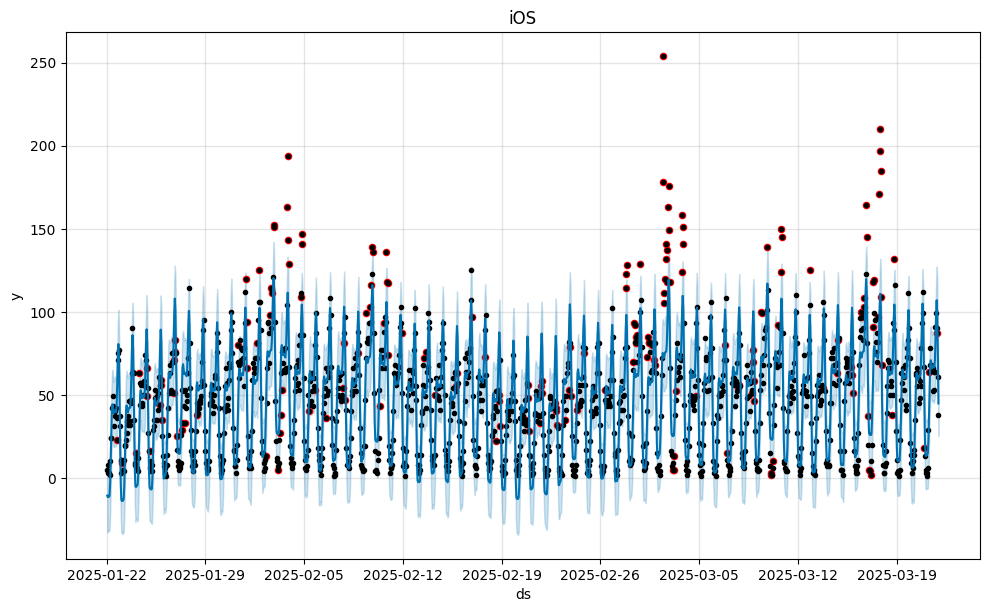

In [67]:
orders_contribution_dev = anomaly_contribution(orders_top_level, orders_by_device, devices)
orders_contributions_device = orders_contribution_dev[orders_contribution_dev["is_anomaly"] == 1]
orders_contributions_device.head()

18:31:45 - cmdstanpy - INFO - Chain [1] start processing
18:31:45 - cmdstanpy - INFO - Chain [1] done processing
18:31:46 - cmdstanpy - INFO - Chain [1] start processing
18:31:46 - cmdstanpy - INFO - Chain [1] done processing
18:31:46 - cmdstanpy - INFO - Chain [1] start processing
18:31:46 - cmdstanpy - INFO - Chain [1] done processing
18:31:46 - cmdstanpy - INFO - Chain [1] start processing
18:31:46 - cmdstanpy - INFO - Chain [1] done processing
18:31:46 - cmdstanpy - INFO - Chain [1] start processing
18:31:46 - cmdstanpy - INFO - Chain [1] done processing
18:31:47 - cmdstanpy - INFO - Chain [1] start processing
18:31:47 - cmdstanpy - INFO - Chain [1] done processing


Android added!
Linux added!
macOS added!
Other added!
Windows added!
iOS added!


ds  yhat_lower  yhat_upper        yhat   y  is_anomaly  \
16 2025-01-22 17:00:00   35.788823   87.084856   61.127606  30           1   
25 2025-01-23 02:00:00  -41.826471    9.438302  -16.093078  12           1   
54 2025-01-24 07:00:00    1.962403   53.081529   27.652228  75           1   
67 2025-01-24 20:00:00   89.625481  140.499786  114.983467  87           1   
68 2025-01-24 21:00:00   79.432452  130.362096  104.620205  70           1   

         diff  percent_diff  pred added  diff added  ...  \
16  31.127606      1.037587   62.605190   32.605190  ...   
25  28.093078      2.341090  -14.746120   28.669727  ...   
54  47.347772      0.631304   28.782305   51.222946  ...   
67  27.983467      0.321649  115.987971   32.279555  ...   
68  34.620205      0.494574  105.617109   37.092705  ...   

    percent_diff Windows   pred iOS   diff iOS  percent_diff iOS  \
16              3.849460  42.433173  19.433173          0.844921   
25                   NaN -12.343019  22.343019          2.234302   
54                   NaN  20.478691  42.521309          0.674941   
67              0.192993  86.289188  20.289188          0.307412   
68              0.478942  78.522202  29.522202          0.602494   

    perc diff Android  perc diff Linux  perc diff macOS  perc diff Other  \
16           0.146311         0.002302         0.132441         0.004869   
25           0.186889         0.000817         0.008515         0.000239   
54           0.114976         0.001014         0.006045         0.000025   
67           0.297467         0.027070         0.014048         0.008953   
68           0.153459         0.003414         0.001509         0.019891   

    perc diff Windows  perc diff iOS  
16           0.118063       0.596015  
25           0.024216       0.779324  
54           0.047818       0.830122  
67           0.023915       0.628546  
68           0.025824       0.795903  

[5 rows x 35 columns]

<Figure size 3000x2000 with 0 Axes>

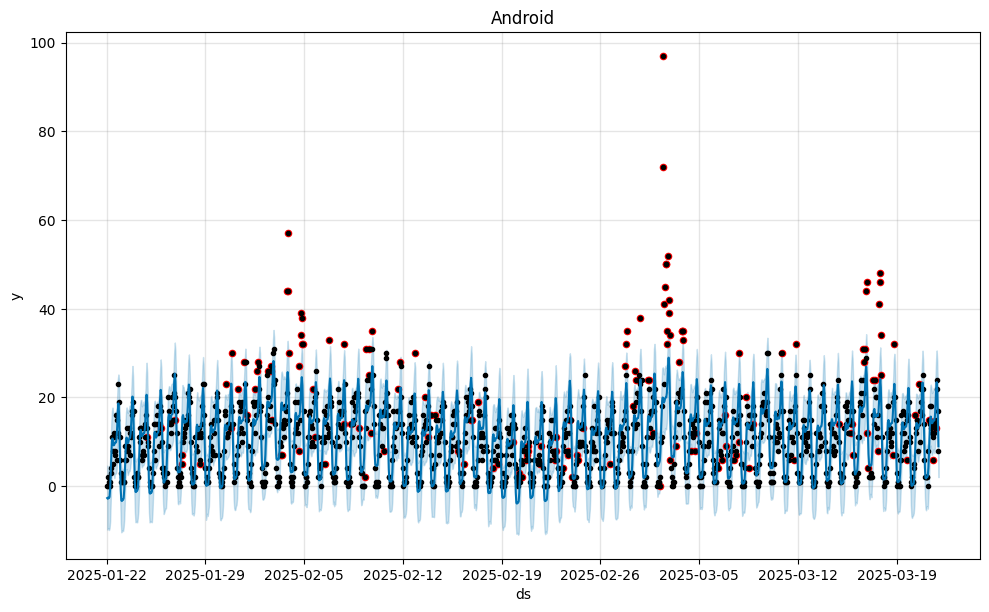

<Figure size 3000x2000 with 0 Axes>

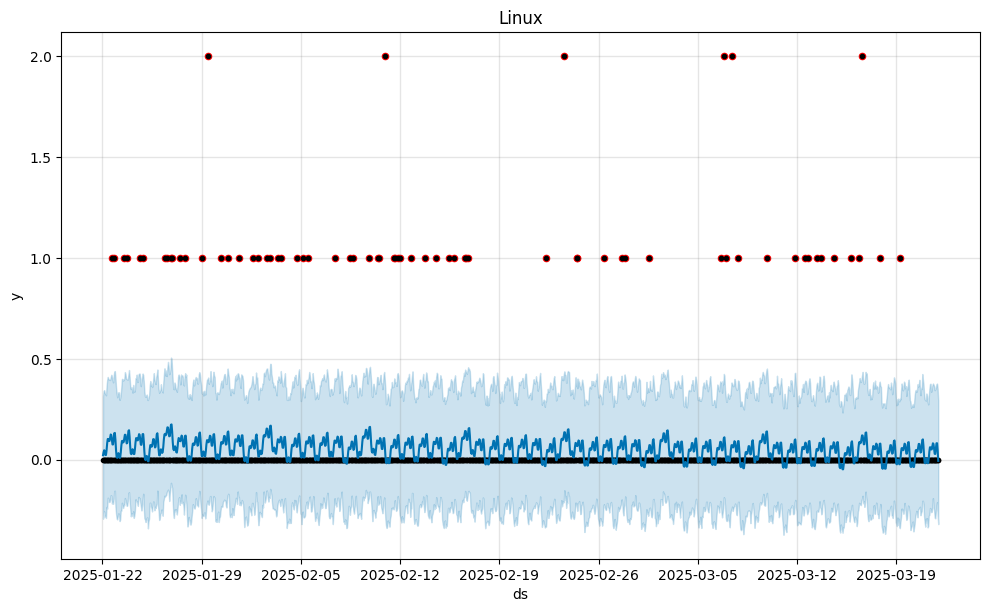

<Figure size 3000x2000 with 0 Axes>

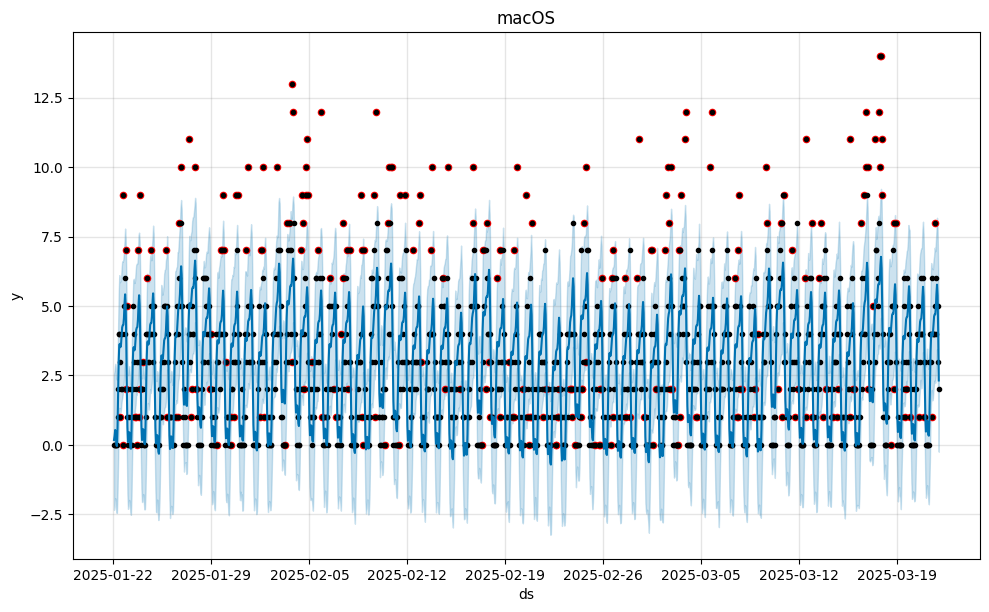

<Figure size 3000x2000 with 0 Axes>

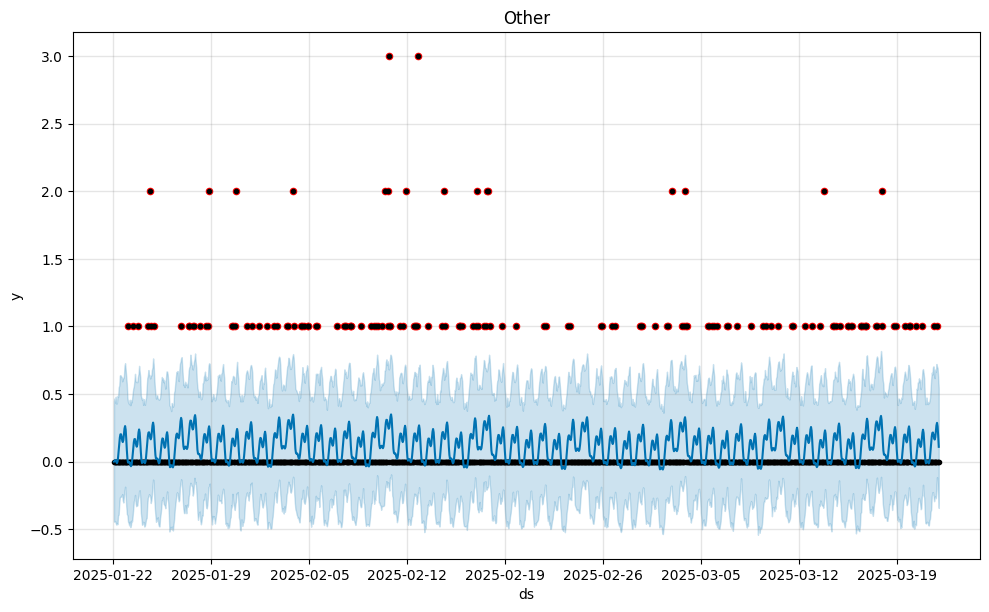

<Figure size 3000x2000 with 0 Axes>

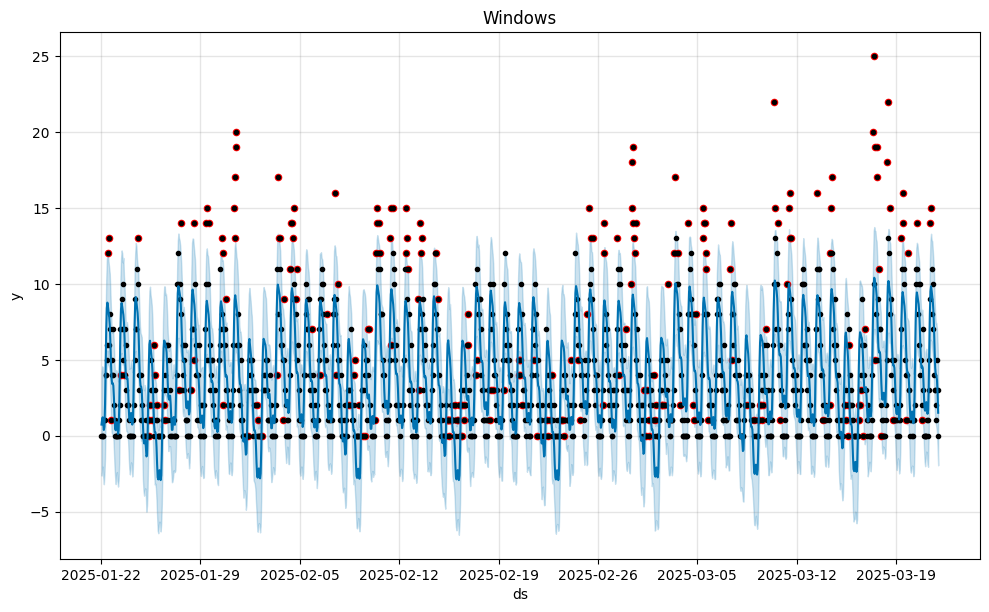

<Figure size 3000x2000 with 0 Axes>

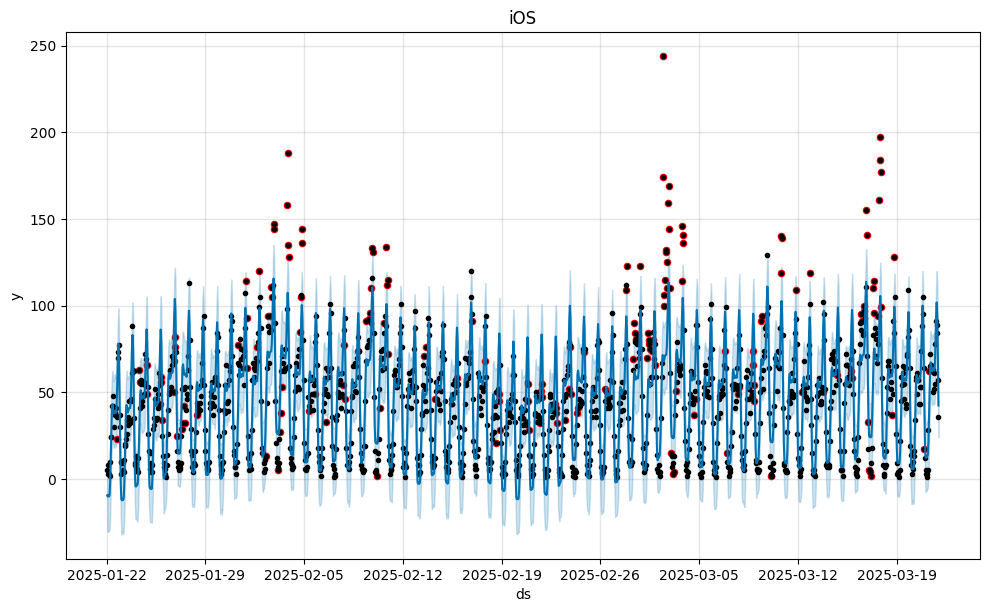

In [78]:
buyers_contribution_dev = anomaly_contribution(buyers_top_level, buyers_by_device, devices)
buyers_contributions_device = buyers_contribution_dev[buyers_contribution_dev["is_anomaly"] == 1]
buyers_contributions_device.head()

In [79]:
visitors_anomaly_percentages_device = visitors_contributions_device.set_index('ds')[["percent_diff "+device for device in devices]]
visitor_anomaly_percentages_geo = visitors_geo_contributions.set_index('ds')[["percent_diff Global", "percent_diff US"]]
visitor_anomaly_percentages_geo

percent_diff Global  percent_diff US
ds                                                       
2025-01-22 07:00:00             0.525244         0.050987
2025-01-24 07:00:00             0.535034         0.333185
2025-01-26 07:00:00             1.039615         0.833827
2025-01-26 10:00:00             0.608616         2.096091
2025-01-26 11:00:00             0.346378         1.958497
...                                  ...              ...
2025-03-16 12:00:00             0.310577         0.419574
2025-03-16 16:00:00             0.281646         0.607458
2025-03-16 19:00:00             0.282007         0.351303
2025-03-17 07:00:00             0.575722         1.275014
2025-03-17 18:00:00             0.313598         0.368948

[65 rows x 2 columns]

In [80]:
orders_anomaly_percentages_device = orders_contributions_device.set_index('ds')[["percent_diff "+device for device in devices]]
order_anomaly_percentages_geo = orders_geo_contributions.set_index('ds')[["percent_diff Global", "percent_diff US"]]
order_anomaly_percentages_geo

percent_diff Global  percent_diff US
ds                                                       
2025-01-22 17:00:00             1.153139         1.566284
2025-01-23 02:00:00             6.749738         0.317472
2025-01-23 03:00:00             4.509102         0.131071
2025-01-24 07:00:00             0.638584         0.222445
2025-01-24 20:00:00             0.418319         0.150053
...                                  ...              ...
2025-03-18 16:00:00             0.471276         0.111918
2025-03-18 20:00:00             0.222136              NaN
2025-03-19 15:00:00             0.439192         0.252032
2025-03-20 23:00:00             1.335766         0.233652
2025-03-21 07:00:00             0.400726         1.440790

[180 rows x 2 columns]

In [81]:
buyers_anomaly_percentages_device = buyers_contributions_device.set_index('ds')[["percent_diff "+device for device in devices]]
buyer_anomaly_percentages_geo = buyers_geo_contributions.set_index('ds')[["percent_diff Global", "percent_diff US"]]
buyer_anomaly_percentages_geo

percent_diff Global  percent_diff US
ds                                                       
2025-01-22 17:00:00             1.018953         1.412559
2025-01-23 02:00:00             6.280296         0.347029
2025-01-24 07:00:00             0.644849         0.263586
2025-01-24 20:00:00             0.360006         0.180110
2025-01-24 21:00:00             0.535669         0.020800
...                                  ...              ...
2025-03-17 21:00:00             0.430214         0.029307
2025-03-17 22:00:00             0.292360              NaN
2025-03-18 20:00:00             0.229107              NaN
2025-03-20 23:00:00             1.283676         0.261561
2025-03-21 07:00:00             0.408867         1.284007

[167 rows x 2 columns]

In [71]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl (11.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [72]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def find_eps(df):
  nn = NearestNeighbors(n_neighbors=8).fit(df)
  distances, indices = nn.kneighbors(df)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
  kneedle.plot_knee()
  return distances[kneedle.elbow]

def find_maximum_contributors(df, index, eps):
  reshaped_row = np.array(df.iloc[index].to_list()).reshape(-1, 1)
  db = DBSCAN(eps=eps*0.5, min_samples=1).fit(reshaped_row)
  labels = db.labels_
  clusters = {}
  for label in set(labels):
    clusters[label] = reshaped_row[labels == label]
  sorted_clusters = {k: clusters[k] for k in sorted(clusters, key=lambda k: max(clusters[k]), reverse=True)}
  max_contributors = sorted_clusters[list(sorted_clusters.keys())[0]]
  if len(sorted_clusters.keys()) == 1:
    return
  contributing_columns = []
  for val in max_contributors:
    col_index = list(reshaped_row).index(val)
    contributing_columns.append(df.columns[col_index])
  return contributing_columns

def create_contributor_col(df):
  df = df.fillna(0)
  eps = find_eps(df)
  contribution_list = []
  for i in range(df.shape[0]):
    contribution_list.append(find_maximum_contributors(df, i, eps))
  df['Contributors'] = contribution_list
  return df

ds  percent_diff Android  percent_diff Linux  \
0 2025-01-22 07:00:00              0.367661            0.955654   
1 2025-01-24 07:00:00              0.462108            0.760931   
2 2025-01-26 07:00:00              1.003442           30.199861   
3 2025-01-26 10:00:00              0.545791            4.017911   
4 2025-01-26 11:00:00              0.242273            6.338761   

   percent_diff macOS  percent_diff Other  percent_diff Windows  \
0            0.113492            0.044859              0.735279   
1            0.233628            0.087905              0.706818   
2            0.947322            0.946119              3.994104   
3            0.475129            0.443096              0.572113   
4            0.332126            0.321973              0.122191   

   percent_diff iOS          Contributors  
0          0.393971                  None  
1          0.472035                  None  
2          0.895176  [percent_diff Linux]  
3          0.614862  [percent_diff Linux]  
4          0.361919  [percent_diff Linux]

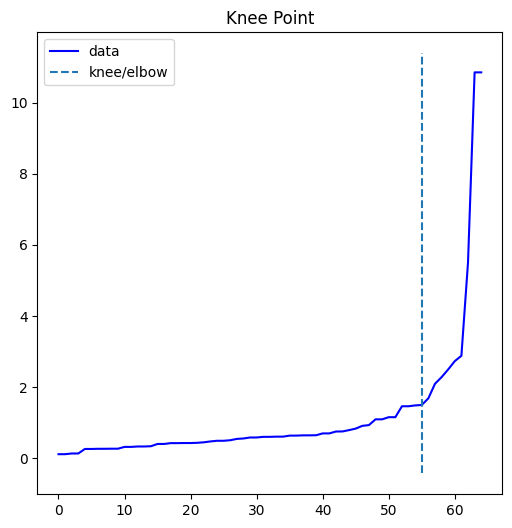

In [73]:
visitor_device_contributing_columns = create_contributor_col(visitors_anomaly_percentages_device)
visitor_device_contributing_columns.reset_index(inplace=True)
visitor_device_contributing_columns.head()

ds_x  percent_diff Android  percent_diff Linux  \
0   2025-02-03 01:00:00              2.533573            0.031775   
1   2025-02-03 02:00:00              2.532835            0.272910   
2                   NaT                   NaN                 NaN   
3                   NaT                   NaN                 NaN   
4                   NaT                   NaN                 NaN   
..                  ...                   ...                 ...   
412 2025-03-17 07:00:00              0.581673            0.532894   
413 2025-03-17 07:00:00              0.581673            0.532894   
414 2025-03-17 07:00:00              0.581673            0.532894   
415 2025-03-17 07:00:00              0.581673            0.532894   
416 2025-03-17 07:00:00              0.581673            0.532894   

     percent_diff macOS  percent_diff Other  percent_diff Windows  \
0              0.143439            0.723907              1.422655   
1              0.952378            0.597463              0.934695   
2                   NaN                 NaN                   NaN   
3                   NaN                 NaN                   NaN   
4                   NaN                 NaN                   NaN   
..                  ...                 ...                   ...   
412            0.439397            0.321285              0.505272   
413            0.439397            0.321285              0.505272   
414            0.439397            0.321285              0.505272   
415            0.439397            0.321285              0.505272   
416            0.439397            0.321285              0.505272   

     percent_diff iOS             Contributors                ds_y  \
0            1.153049  (percent_diff Android,)                 NaT   
1            1.753009  (percent_diff Android,)                 NaT   
2                 NaN   (percent_diff Global,) 2025-01-22 07:00:00   
3                 NaN   (percent_diff Global,) 2025-01-24 07:00:00   
4                 NaN   (percent_diff Global,) 2025-01-26 07:00:00   
..                ...                      ...                 ...   
412          0.595492                     None 2025-03-12 07:00:00   
413          0.595492                     None 2025-03-15 20:00:00   
414          0.595492                     None 2025-03-15 21:00:00   
415          0.595492                     None 2025-03-16 19:00:00   
416          0.595492                     None 2025-03-17 18:00:00   

     percent_diff Global  percent_diff US  
0                    NaN              NaN  
1                    NaN              NaN  
2               0.525244         0.050987  
3               0.535034         0.333185  
4               1.039615         0.833827  
..                   ...              ...  
412             0.665391         0.633232  
413             0.468836         0.474341  
414             0.411344         0.377853  
415             0.282007         0.351303  
416             0.313598         0.368948  

[417 rows x 11 columns]

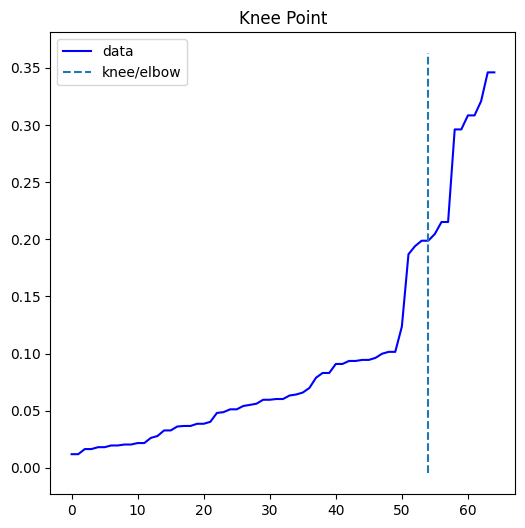

In [77]:
visitor_geography_contributing_columns = create_contributor_col(visitor_anomaly_percentages_geo)
visitor_geography_contributing_columns.reset_index(inplace=True)
visitor_geography_contributing_columns.head()

# Convert list values to tuples in Contributors column before merging
visitor_device_contributing_columns['Contributors'] = visitor_device_contributing_columns['Contributors'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
visitor_geography_contributing_columns['Contributors'] = visitor_geography_contributing_columns['Contributors'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Now merge the dataframes
visitor_contributing_columns = pd.merge(
    visitor_device_contributing_columns,
    visitor_geography_contributing_columns,
    on='Contributors',
    how='outer'
)

visitor_contributing_columns

ds_x  percent_diff Android  percent_diff Linux  \
0    2025-01-23 02:00:00              2.939196                 0.0   
1    2025-02-03 09:00:00              1.452078                 0.0   
2    2025-02-10 03:00:00              4.103353                 0.0   
3    2025-02-20 06:00:00              1.752272                 0.0   
4    2025-02-20 19:00:00              1.650382                 0.0   
...                  ...                   ...                 ...   
8073 2025-03-21 07:00:00              0.451090                 0.0   
8074 2025-03-21 07:00:00              0.451090                 0.0   
8075 2025-03-21 07:00:00              0.451090                 0.0   
8076 2025-03-21 07:00:00              0.451090                 0.0   
8077 2025-03-21 07:00:00              0.451090                 0.0   

      percent_diff macOS  percent_diff Other  percent_diff Windows  \
0               0.000000                 0.0              0.000000   
1               0.018149                 0.0              0.690536   
2               0.000000                 0.0              0.000000   
3               1.193578                 0.0              0.574237   
4               0.143433                 0.0              0.511689   
...                  ...                 ...                   ...   
8073            0.567465                 0.0              0.428984   
8074            0.567465                 0.0              0.428984   
8075            0.567465                 0.0              0.428984   
8076            0.567465                 0.0              0.428984   
8077            0.567465                 0.0              0.428984   

      percent_diff iOS             Contributors                ds_y  \
0             2.398326  (percent_diff Android,)                 NaT   
1             0.233966  (percent_diff Android,)                 NaT   
2             3.544023  (percent_diff Android,)                 NaT   
3             1.275401  (percent_diff Android,)                 NaT   
4             0.337475  (percent_diff Android,)                 NaT   
...                ...                      ...                 ...   
8073          0.394035                     None 2025-03-17 21:00:00   
8074          0.394035                     None 2025-03-17 22:00:00   
8075          0.394035                     None 2025-03-18 16:00:00   
8076          0.394035                     None 2025-03-18 20:00:00   
8077          0.394035                     None 2025-03-19 15:00:00   

      percent_diff Global  percent_diff US  
0                     NaN              NaN  
1                     NaN              NaN  
2                     NaN              NaN  
3                     NaN              NaN  
4                     NaN              NaN  
...                   ...              ...  
8073             0.433402         0.250063  
8074             0.315333         0.000000  
8075             0.471276         0.111918  
8076             0.222136         0.000000  
8077             0.439192         0.252032  

[8078 rows x 11 columns]

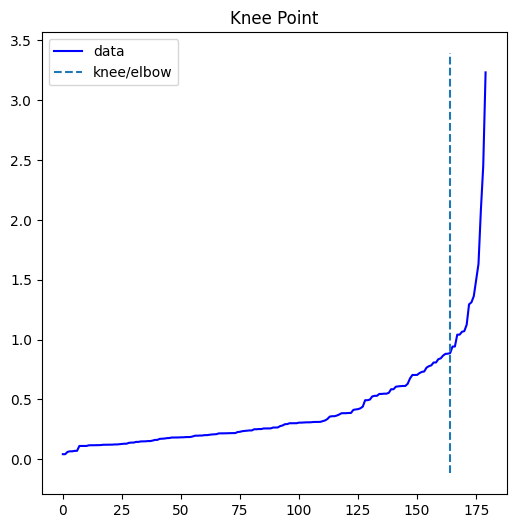

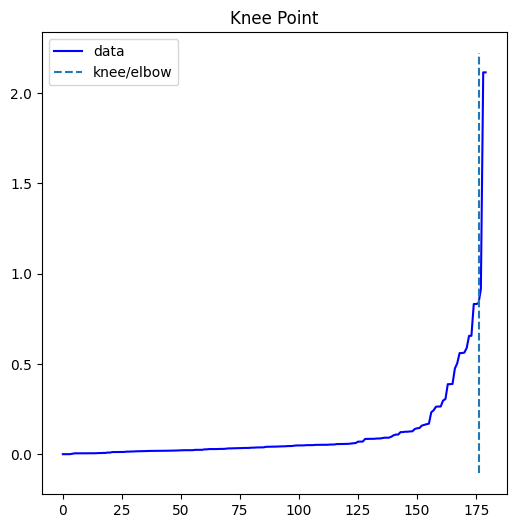

In [82]:
order_device_contributing_columns = create_contributor_col(orders_anomaly_percentages_device)
order_device_contributing_columns.reset_index(inplace=True)
order_device_contributing_columns.head()

order_geography_contributing_columns = create_contributor_col(order_anomaly_percentages_geo)
order_geography_contributing_columns.reset_index(inplace=True)
order_geography_contributing_columns.head()

# Convert list values to tuples in Contributors column before merging
order_device_contributing_columns['Contributors'] = order_device_contributing_columns['Contributors'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
order_geography_contributing_columns['Contributors'] = order_geography_contributing_columns['Contributors'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Now merge the dataframes
order_contributing_columns = pd.merge(
    order_device_contributing_columns,
    order_geography_contributing_columns,
    on='Contributors',
    how='outer'
)

order_contributing_columns

Index(['ds_x', 'percent_diff Android', 'percent_diff Linux',
       'percent_diff macOS', 'percent_diff Other', 'percent_diff Windows',
       'percent_diff iOS', 'Contributors', 'ds_y', 'percent_diff Global',
       'percent_diff US'],
      dtype='object')

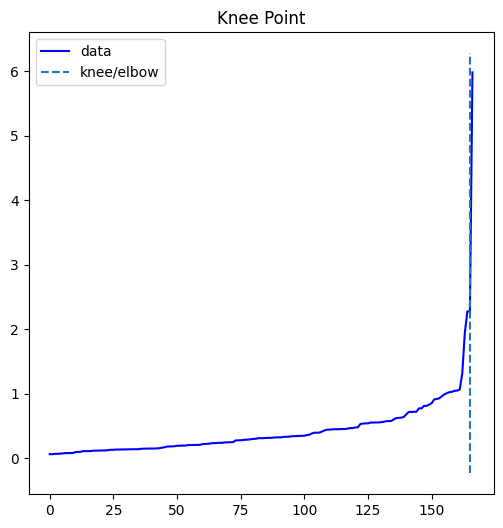

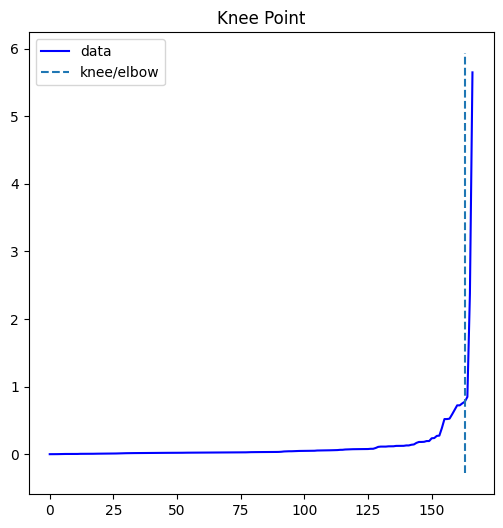

In [111]:
buyer_device_contributing_columns = create_contributor_col(buyers_anomaly_percentages_device)
buyer_device_contributing_columns.reset_index(inplace=True)
buyer_device_contributing_columns.head()

buyer_geography_contributing_columns = create_contributor_col(buyer_anomaly_percentages_geo)
buyer_geography_contributing_columns.reset_index(inplace=True)
buyer_geography_contributing_columns.head()

# Convert list values to tuples in Contributors column before merging
buyer_device_contributing_columns['Contributors'] = buyer_device_contributing_columns['Contributors'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
buyer_geography_contributing_columns['Contributors'] = buyer_geography_contributing_columns['Contributors'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Now merge the dataframes
buyer_contributing_columns = pd.merge(
    buyer_device_contributing_columns,
    buyer_geography_contributing_columns,
    on='Contributors',
    how='outer'
)

buyer_contributing_columns.columns

In [97]:
def clean_contributors(contributors):
    if not contributors or all(c is None for c in contributors):
        return None
    
    # Flatten the list of contributors and clean up each name
    cleaned = []
    for c in contributors:
        if c is not None:
            if isinstance(c, tuple):
                # If it's a tuple, process each element
                for item in c:
                    if item is not None:
                        # Remove 'percent_diff' prefix if it exists
                        name = str(item).replace('percent_diff', '')
                        # Capitalize first letter of each word
                        # name = ' '.join(word.capitalize() for word in name.split('_'))
                        cleaned.append(name)
            else:
                # If it's a single value, just clean it
                name = str(c).replace('percent_diff', '')
                # Capitalize first letter of each word
                # name = ' '.join(word.capitalize() for word in name.split('_'))
                cleaned.append(name)
    
    return list(set(cleaned))  # Remove duplicates

In [120]:
import plotly.express as px

# Create the figure
fig = px.line(visitors_top_level, x='ds', y='y',
          title="Total Visitors Over Time with Anomalies",
          labels={"y": "Number of Visitors", "ds": "Time"})

# Add highlighted regions for hours with anomalies
for idx, row in anomaly_df.iterrows():
    if row['event_names']:  # If there are any anomalies in this hour
        fig.add_vrect(x0=row['hour'] - pd.Timedelta(hours=0.5), 
                 x1=row['hour'] + pd.Timedelta(hours=0.5),
                 fillcolor="red", 
                 opacity=0.3, 
                 line_width=0)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Number of Visitors",
    hovermode="x unified",
    showlegend=False
)

# Create hover text that includes event names and their corresponding metric contributors
hover_text = []
for idx, row in anomaly_df.iterrows():
    # Get the visitor count for this hour from visitors_top_level
    visitor_count = visitors_top_level[visitors_top_level['ds'] == row['hour']]['y'].values
    visitor_count = visitor_count[0] if len(visitor_count) > 0 else "N/A"

    hover_info = f"<b>Time:</b> {row['hour']}<br>"
    hover_info += f"<b>Visitors:</b> {visitor_count}<br>"

    if row['event_names']:
        hover_info += "<b>Anomalies:</b><br>"
        # Check each event name to determine which metric it belongs to
        for event in row['event_names']:
            hover_info += f"- {event}"
            
            # Get the contributors for this specific hour
            current_hour = row['hour']
            
            # Check which metric this event belongs to and add its cleaned contributors
            if 'visitor' in event.lower():
                # Filter visitor contributors for this hour
                hour_data = visitor_contributing_columns[
                    visitor_contributing_columns['ds_x'] == current_hour
                ]
                if not hour_data.empty:
                    contributors = clean_contributors(hour_data['Contributors'].tolist())
                    if contributors:
                        hover_info += " (Contributors: "
                        contributor_info = []
                        for contrib in contributors:
                            # Find the percent_diff for this contributor using the correct column name
                            percent_diff_col = [i for i in hour_data.columns if contrib in i][0]
                            if percent_diff_col in hour_data.columns:
                                percent_diff = hour_data[percent_diff_col].values[0]
                                contributor_info.append(f"{contrib} ({percent_diff:.1f}%)")
                        hover_info += ", ".join(contributor_info) + ")"
                    else:
                        hover_info += " (Contributors: N/A)"
            elif 'order' in event.lower():
                # Filter order contributors for this hour
                hour_data = order_contributing_columns[
                    order_contributing_columns['ds_x'] == current_hour
                ]
                if not hour_data.empty:
                    contributors = clean_contributors(hour_data['Contributors'].tolist())
                    if contributors:
                        hover_info += " (Contributors: "
                        contributor_info = []
                        for contrib in contributors:
                            # Find the percent_diff for this contributor using the correct column name
                            percent_diff_col = [i for i in hour_data.columns if contrib in i][0]
                            if percent_diff_col in hour_data.columns:
                                percent_diff = hour_data[percent_diff_col].values[0]
                                contributor_info.append(f"{contrib} ({percent_diff:.1f}%)")
                        hover_info += ", ".join(contributor_info) + ")"
                    else:
                        hover_info += " (Contributors: N/A)"
            elif 'buyer' in event.lower():
                # Filter buyer contributors for this hour
                hour_data = buyer_contributing_columns[
                    buyer_contributing_columns['ds_x'] == current_hour
                ]
                if not hour_data.empty:
                    contributors = clean_contributors(hour_data['Contributors'].tolist())
                    if contributors:
                        hover_info += " (Contributors: "
                        contributor_info = []
                        for contrib in contributors:
                            # Find the percent_diff for this contributor using the correct column name
                            percent_diff_col = [i for i in hour_data.columns if contrib in i][0]
                            if percent_diff_col in hour_data.columns:
                                percent_diff = hour_data[percent_diff_col].values[0]
                                contributor_info.append(f"{contrib} ({percent_diff:.1f}%)")
                        hover_info += ", ".join(contributor_info) + ")"
                    else:
                        hover_info += " (Contributors: N/A)"
        
            hover_info += "<br>"

    hover_text.append(hover_info)

# Update hover template
fig.update_traces(
    hovertemplate="%{customdata}<extra></extra>",
    customdata=hover_text
)

# Show the figure
fig.show()

In [119]:
def plot_visitors_anomalies(anomaly_df, visitors_df, start_date, end_date):
    """
    Plot visitors and anomalies for a date range.
    
    Parameters:
    -----------
    anomaly_df : pandas DataFrame
        DataFrame containing anomaly information with 'hour' and 'event_names' columns
    visitors_df : pandas DataFrame
        DataFrame containing visitor information with 'ds' and 'y' columns
    start_date : str or datetime
        The start date (e.g., '2025-02-15')
    end_date : str or datetime
        The end date (e.g., '2025-02-16')
    """
    import plotly.express as px
    
    # Convert dates to datetime if they're strings
    start_time = pd.to_datetime(start_date).replace(hour=0, minute=0, second=0)
    end_time = pd.to_datetime(end_date).replace(hour=23, minute=59, second=59)
    
    # Filter data for the date range
    filtered_visitors = visitors_df[
        (visitors_df['ds'] >= start_time) & 
        (visitors_df['ds'] <= end_time)
    ].copy()
    
    filtered_anomalies = anomaly_df[
        (anomaly_df['hour'] >= start_time) & 
        (anomaly_df['hour'] <= end_time)
    ].copy()
    
    # Create the figure
    fig = px.line(filtered_visitors, x='ds', y='y',
              title="Total Visitors Over Time with Anomalies",
              labels={"y": "Number of Visitors", "ds": "Time"})

    # Add highlighted regions for hours with anomalies
    for idx, row in filtered_anomalies.iterrows():
        if row['event_names']:  # If there are any anomalies in this hour
            fig.add_vrect(x0=row['hour'] - pd.Timedelta(hours=0.5), 
                     x1=row['hour'] + pd.Timedelta(hours=0.5),
                     fillcolor="red", 
                     opacity=0.3, 
                     line_width=0)

    # Update layout for better visualization
    fig.update_layout(
        xaxis_title="Time",
        yaxis_title="Number of Visitors",
        hovermode="x unified",
        showlegend=False
    )

    # Create hover text that includes event names and their corresponding metric contributors
    hover_text = []
    for idx, row in filtered_anomalies.iterrows():
        # Get the visitor count for this hour from visitors_top_level
        visitor_count = filtered_visitors[filtered_visitors['ds'] == row['hour']]['y'].values
        visitor_count = visitor_count[0] if len(visitor_count) > 0 else "N/A"
    
        hover_info = f"<b>Time:</b> {row['hour']}<br>"
        hover_info += f"<b>Visitors:</b> {visitor_count}<br>"

        if row['event_names']:
            hover_info += "<b>Anomalies:</b><br>"
            # Check each event name to determine which metric it belongs to
            for event in row['event_names']:
                hover_info += f"- {event}"
                
                # Get the contributors for this specific hour
                current_hour = row['hour']
                
                # Check which metric this event belongs to and add its cleaned contributors
                if 'visitor' in event.lower():
                    # Filter visitor contributors for this hour
                    hour_data = visitor_contributing_columns[
                        visitor_contributing_columns['ds_x'] == current_hour
                    ]
                    if not hour_data.empty:
                        contributors = clean_contributors(hour_data['Contributors'].tolist())
                        if contributors:
                            hover_info += " (Contributors: "
                            contributor_info = []
                            for contrib in contributors:
                                # Find the percent_diff for this contributor using the correct column name
                                percent_diff_col = [i for i in hour_data.columns if contrib in i][0]
                                if percent_diff_col in hour_data.columns:
                                    percent_diff = hour_data[percent_diff_col].values[0]
                                    contributor_info.append(f"{contrib} ({percent_diff:.1f}%)")
                            hover_info += ", ".join(contributor_info) + ")"
                        else:
                            hover_info += " (Contributors: N/A)"
                elif 'order' in event.lower():
                    # Filter order contributors for this hour
                    hour_data = order_contributing_columns[
                        order_contributing_columns['ds_x'] == current_hour
                    ]
                    if not hour_data.empty:
                        contributors = clean_contributors(hour_data['Contributors'].tolist())
                        if contributors:
                            hover_info += " (Contributors: "
                            contributor_info = []
                            for contrib in contributors:
                                # Find the percent_diff for this contributor using the correct column name
                                percent_diff_col = [i for i in hour_data.columns if contrib in i][0]
                                if percent_diff_col in hour_data.columns:
                                    percent_diff = hour_data[percent_diff_col].values[0]
                                    contributor_info.append(f"{contrib} ({percent_diff:.1f}%)")
                            hover_info += ", ".join(contributor_info) + ")"
                        else:
                            hover_info += " (Contributors: N/A)"
                elif 'buyer' in event.lower():
                    # Filter buyer contributors for this hour
                    hour_data = buyer_contributing_columns[
                        buyer_contributing_columns['ds_x'] == current_hour
                    ]
                    if not hour_data.empty:
                        contributors = clean_contributors(hour_data['Contributors'].tolist())
                        if contributors:
                            hover_info += " (Contributors: "
                            contributor_info = []
                            for contrib in contributors:
                                # Find the percent_diff for this contributor using the correct column name
                                percent_diff_col = [i for i in hour_data.columns if contrib in i][0]
                                if percent_diff_col in hour_data.columns:
                                    percent_diff = hour_data[percent_diff_col].values[0]
                                    contributor_info.append(f"{contrib} ({percent_diff:.1f}%)")
                            hover_info += ", ".join(contributor_info) + ")"
                        else:
                            hover_info += " (Contributors: N/A)"
            
                hover_info += "<br>"
    
        hover_text.append(hover_info)

    # Update hover template
    fig.update_traces(
        hovertemplate="%{customdata}<extra></extra>",
        customdata=hover_text
    )

    # Show the figure
    fig.show()

# Example usage:
plot_visitors_anomalies(anomaly_df, visitors_top_level, '2025-03-03', '2025-03-04')

In [116]:
hour_data = visitor_contributing_columns[visitor_contributing_columns['ds_x'] == '2025-01-23 02:00:00']
hour_data.columns

Index(['ds_x', 'percent_diff Android', 'percent_diff Linux',
       'percent_diff macOS', 'percent_diff Other', 'percent_diff Windows',
       'percent_diff iOS', 'Contributors', 'ds_y', 'percent_diff Global',
       'percent_diff US'],
      dtype='object')